## First Regime
W is IID Normal

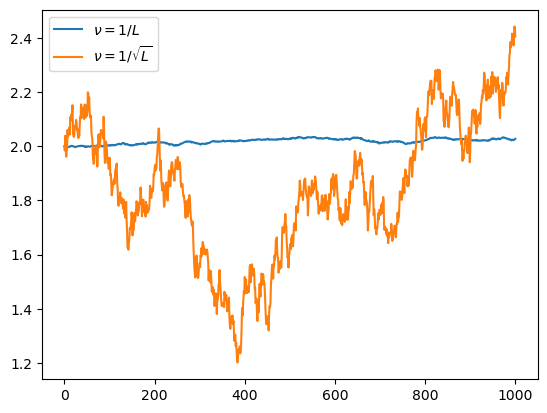

In [2]:
import numpy as np
import matplotlib.pyplot as plt

L = 1000
X0 = 2
sigma = np.tanh

nu = 1 / L
X = np.zeros(L + 1)
X[0] = X0
for k in range(L):
    Wk = np.random.normal(0, 1)
    X[k + 1] = X[k] + nu*Wk * sigma(X[k])

plt.plot(X, label=r"$\nu = 1/L$")

nu = 1 / np.sqrt(L)
X = np.zeros(L + 1)
X[0] = X0
for k in range(L):
    Wk = np.random.normal(0, 1)
    X[k + 1] = X[k] + nu*Wk * sigma(X[k])

plt.plot(X, label=r"$\nu = 1/\sqrt{L}$")
plt.legend()
plt.show()

In [3]:
X = np.ones(5)
sigma = np.tanh
sigma_prime = 1- sigma(X)**2
corrected = sigma(X) * sigma_prime
corrected

array([0.31985, 0.31985, 0.31985, 0.31985, 0.31985])

$\nu$ is not scaled (just 1)

<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:26: SyntaxWarning: invalid escape sequence '\s'
/var/folders/cx/4rt1cs1j0t9ffbyb2vdx8bv80000gn/T/ipykernel_70083/2939414425.py:26: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f"Trajectory of $X_k$ for $n={n}, L={L}$, $\sigma=\\tanh$, $\nu^2={nu_squared:.5f}$")


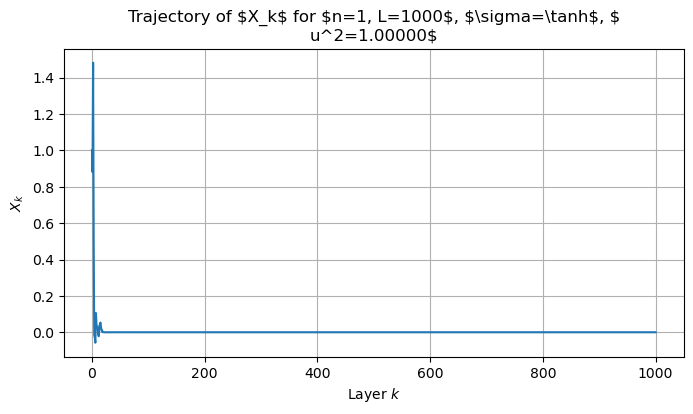

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1000         # Number of layers
n = 1            # Dimension
x0 = np.ones(n)  # Initial input
sigma = np.tanh  # Non-linear activation
nu_squared = 1


trajectory = [x0.copy()]
x = x0.copy()


for k in range(L):
    W = np.random.normal(0, np.sqrt(nu_squared), size=(n, n))
    x = x + W @ sigma(x)
    trajectory.append(x.copy())

trajectory = np.array(trajectory)


plt.figure(figsize=(8, 4))
plt.plot(range(L+1), trajectory)
plt.title(f"Trajectory of $X_k$ for $n={n}, L={L}$, $\sigma=\\tanh$, $\nu^2={nu_squared:.5f}$")
plt.xlabel("Layer $k$")
plt.ylabel("$X_k$")
plt.grid(True)
plt.show()


$\nu$ scaled as $\sqrt{l}$ ($\times \sqrt{n}$)

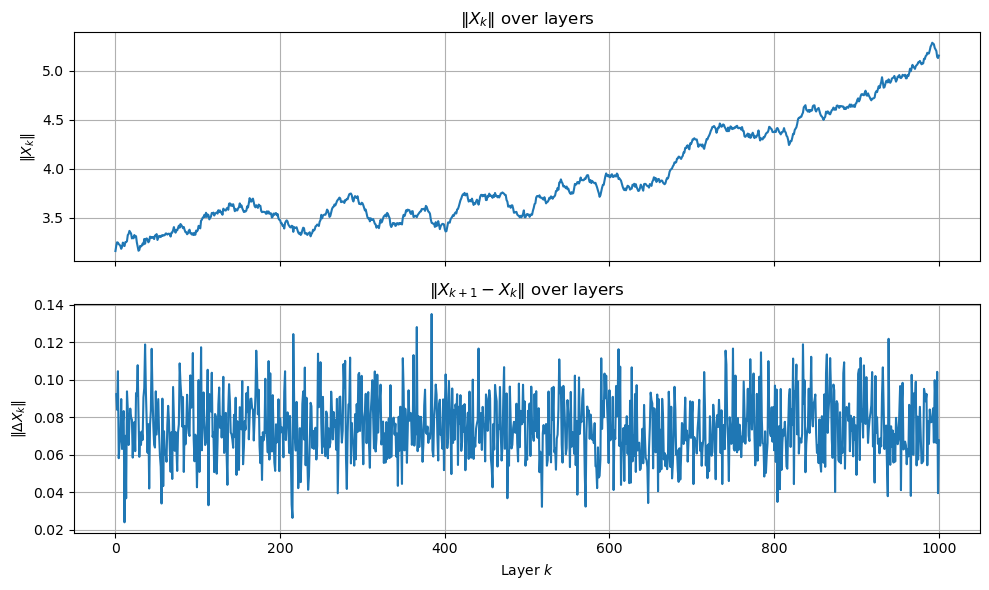

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1000         # Number of layers
n = 10           # Dimension
x0 = np.ones(n)  # Initial input
sigma = np.tanh  # Non-linear activation
nu_squared = 1 / np.sqrt(n * L)

trajectory = [x0.copy()]
x = x0.copy()

for k in range(L):
    W = np.random.normal(0, np.sqrt(nu_squared**2), size=(n, n))
    x = x + W @ sigma(x)
    trajectory.append(x.copy())

trajectory = np.array(trajectory)

x_norms = np.linalg.norm(trajectory, axis=1)
dx_norms = np.linalg.norm(np.diff(trajectory, axis=0), axis=1)

fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

axs[0].plot(range(L + 1), x_norms)
axs[0].set_title(r'$\|X_k\|$ over layers')
axs[0].set_ylabel(r'$\|X_k\|$')
axs[0].grid(True)

axs[1].plot(range(1, L + 1), dx_norms)
axs[1].set_title(r'$\|X_{k+1} - X_k\|$ over layers')
axs[1].set_xlabel('Layer $k$')
axs[1].set_ylabel(r'$\|\Delta X_k\|$')
axs[1].grid(True)

plt.tight_layout()
plt.show()


$\nu$ scaled as $l$

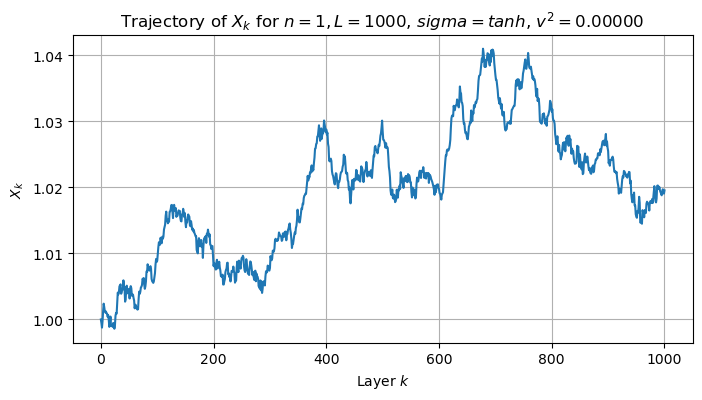

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1000         # Number of layers
n = 1            # Dimension
x0 = np.ones(n)  # Initial input
sigma = np.tanh  # Non-linear activation
nu_squared = 1/((L**2))

# Store trajectory
trajectory = [x0.copy()]
x = x0.copy()

for k in range(L):
    W = np.random.normal(0, np.sqrt(nu_squared), size=(n, n))
    x = x + W @ sigma(x)
    trajectory.append(x.copy())

trajectory = np.array(trajectory)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(range(L+1), trajectory)
plt.title(f"Trajectory of $X_k$ for $n={n}, L={L}$, $sigma=tanh$, $v^2={nu_squared:.5f}$")
plt.xlabel("Layer $k$")
plt.ylabel("$X_k$")
plt.grid(True)
plt.show()

Plotting norm of X for larger n

In [8]:
n=10

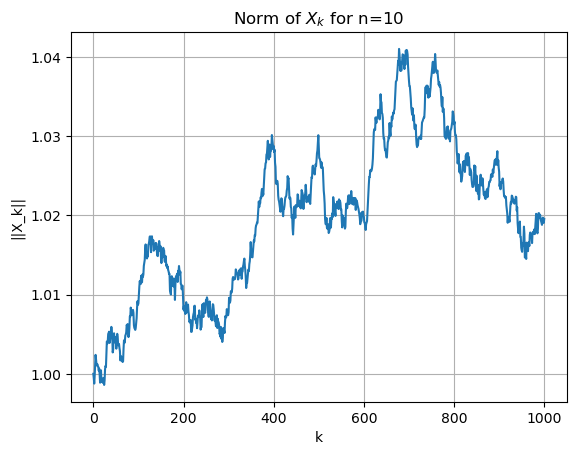

In [9]:
norms = np.linalg.norm(trajectory, axis=1)
plt.plot(range(L+1), norms)
plt.title(f"Norm of $X_k$ for n={n}")
plt.xlabel("k")
plt.ylabel("||X_k||")
plt.grid(True)
plt.show()

$\nu$ scaled as $l \times \sqrt{n}$

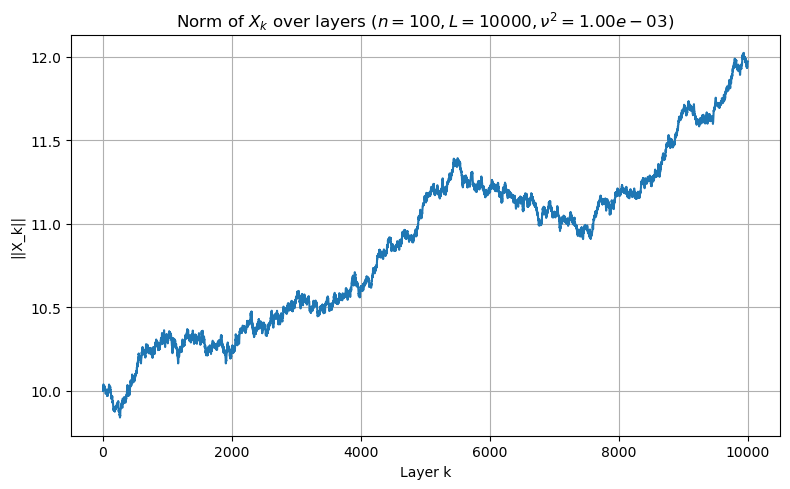

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 10000         # Number of layers (depth)
n = 100          # Dimension
x0 = np.ones(n)  # Initial vector (or use np.random.randn(n))
sigma = np.tanh  # Activation function

nu_squared = 1 / (np.sqrt(n*L))

trajectory = [x0.copy()]
x = x0.copy()

for k in range(L):
    W = np.random.normal(0, np.sqrt(nu_squared**2), size=(n, n))
    x = x + W @ sigma(x)
    trajectory.append(x.copy())

trajectory = np.array(trajectory)

norms = np.linalg.norm(trajectory, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(range(L+1), norms)
plt.title(f"Norm of $X_k$ over layers ($n={n}, L={L}, \\nu^2={nu_squared:.2e}$)")
plt.xlabel("Layer k")
plt.ylabel("||X_k||")
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
x = np.ones(n)
sigma(x)

array([0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159

| Scaling of $ \nu $             | Behavior as $L \to \infty $                            |
|----------------------------------|------------------------------------------------------------|
| Constant ($ \nu \sim 1 $  )      | Divergence / explosion                                  |
| $ \nu \sim \frac{1}{\sqrt{L}} $| Central limit behavior, variance grows like $ \sqrt{L} $ |
| $\nu \sim \frac{1}{L} $    | Finite limit (non-trivial and stable)                   |


## Second Regime

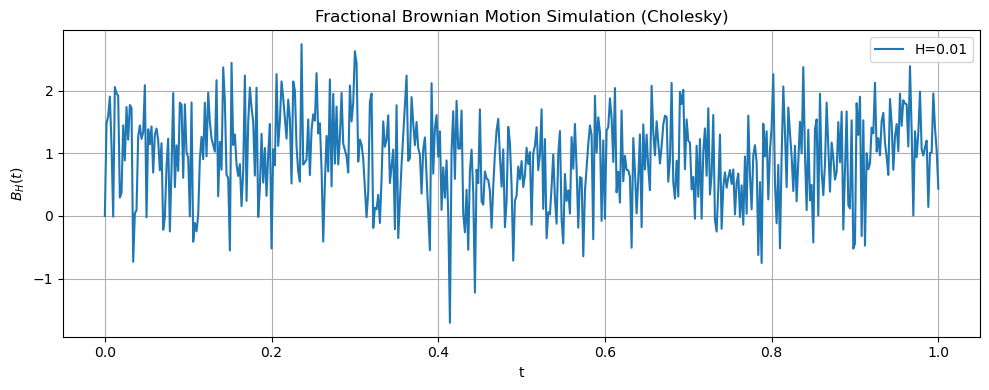

In [12]:
def simulate_fbm_cholesky(H, T, N):
    dt = T / N
    t_vals = np.linspace(0, T, N+1)
    
    cov = np.zeros((N+1, N+1))
    for i in range(N+1):
        for j in range(N+1):
            cov[i, j] = 0.5 * (t_vals[i]**(2*H) + t_vals[j]**(2*H) - abs(t_vals[i] - t_vals[j])**(2*H))
    
    L = np.linalg.cholesky(cov + 1e-10 * np.eye(N+1))  # Add small term for stability
    Z = np.random.randn(N+1)
    B_H = L @ Z

    return t_vals, B_H

# Parameters
H = 0.01    # Hurst parameter
T = 1.0     # Final time
N = 500     # Number of steps

t, bh = simulate_fbm_cholesky(H, T, N)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(t, bh, label=f'H={H}')
plt.title('Fractional Brownian Motion Simulation (Cholesky)')
plt.xlabel('t')
plt.ylabel('$B_H(t)$')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


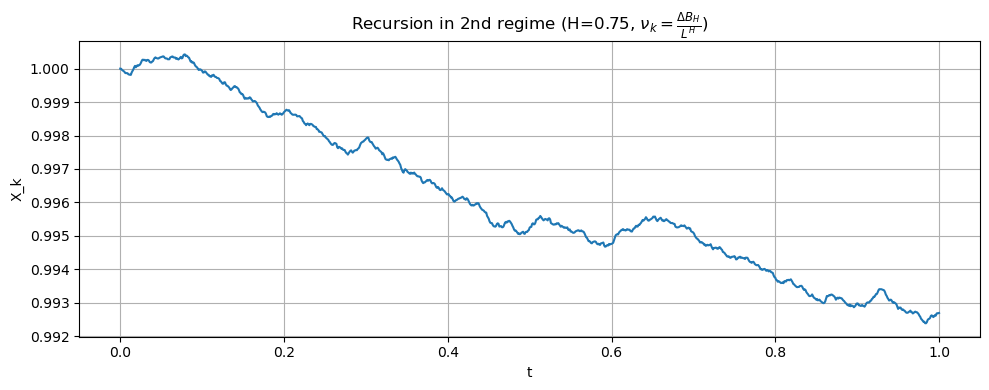

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_fbm(H, L):
    t = np.linspace(0, 1, L + 1)
    cov = 0.5 * (np.abs(t[:, None]) ** (2 * H) +
                 np.abs(t[None, :]) ** (2 * H) -
                 np.abs(t[:, None] - t[None, :]) ** (2 * H))
    L_chol = np.linalg.cholesky(cov + 1e-10 * np.eye(L + 1))
    bh = L_chol @ np.random.randn(L + 1)
    return bh

def run_second_regime_fbm(H=0.75, L=1000000, x0=1.0, sigma=lambda x: x):
    bh = simulate_fbm(H, L)
    dB = (bh[1:] - bh[:-1]) / (L ** H)  # shape (L,)
    
    x_vals = [x0]
    x = x0
    for k in range(L):
        w = dB[k]  # scalar weight
        x = x + w * sigma(x)
        x_vals.append(x)
    
    return np.linspace(0, 1, L + 1), np.array(x_vals)

H = 0.75
L = 1000
t, x_vals = run_second_regime_fbm(H=H, L=L, x0=1.0)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(t, x_vals)
plt.title(f'Recursion in 2nd regime (H={H}, $\\nu_k = \\frac{{\\Delta B_H}}{{L^H}}$)')
plt.xlabel("t")
plt.ylabel("X_k")
plt.grid(True)
plt.tight_layout()
plt.show()


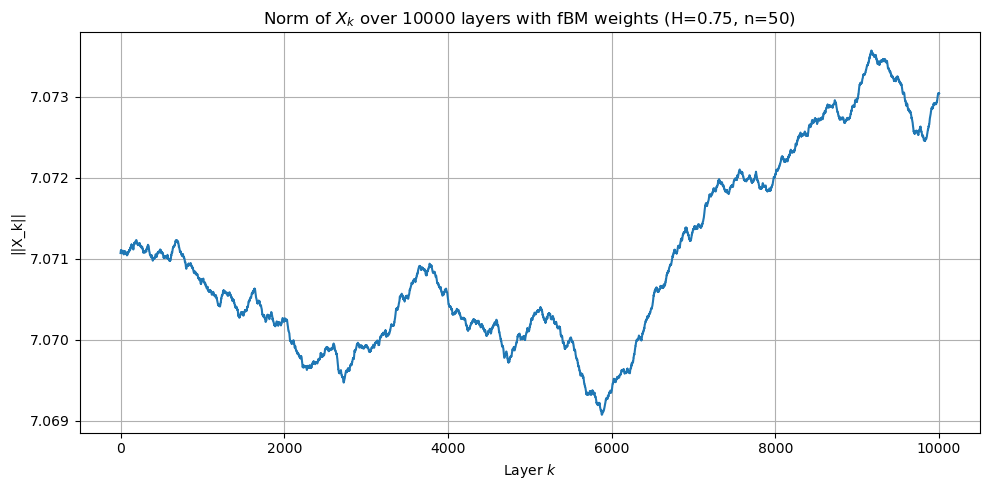

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_fbm_paths(H, L, n):
    t = np.linspace(0, 1, L + 1)
    cov = 0.5 * (np.abs(t[:, None]) ** (2 * H) +
                 np.abs(t[None, :]) ** (2 * H) -
                 np.abs(t[:, None] - t[None, :]) ** (2 * H))
    chol = np.linalg.cholesky(cov + 1e-10 * np.eye(L + 1))

    BH = np.zeros((n, n, L + 1))
    for i in range(n):
        for j in range(n):
            Z = np.random.randn(L + 1)
            BH[i, j, :] = chol @ Z
    return BH

# Parameters
L = 10000           # Number of layers (depth)
n = 50             # Dimension (start small)
H = 0.75           # Hurst parameter
x0 = np.ones(n)    # Initial vector
sigma = np.tanh    # Activation function

BH = simulate_fbm_paths(H, L, n)

dBH = (BH[:, :, 1:] - BH[:, :, :-1]) / (L ** H)  # shape (n, n, L)

trajectory = [x0.copy()]
x = x0.copy()


for k in range(L):
    W = dBH[:, :, k]
    x = x + W @ sigma(x)
    trajectory.append(x.copy())

trajectory = np.array(trajectory)

norms = np.linalg.norm(trajectory, axis=1)

plt.figure(figsize=(10, 5))
plt.plot(norms)
plt.title(f"Norm of $X_k$ over {L} layers with fBM weights (H={H}, n={n})")
plt.xlabel("Layer $k$")
plt.ylabel("||X_k||")
plt.grid(True)
plt.tight_layout()
plt.show()

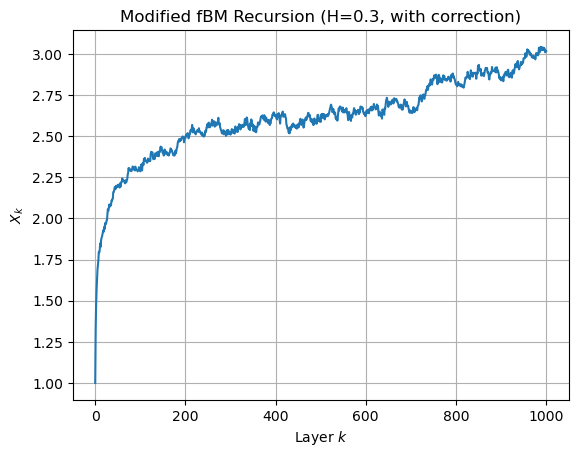

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_fbm(H, L):
    t = np.linspace(0, 1, L + 1)
    cov = 0.5 * (np.abs(t[:, None]) ** (2 * H) +
                 np.abs(t[None, :]) ** (2 * H) -
                 np.abs(t[:, None] - t[None, :]) ** (2 * H))
    chol = np.linalg.cholesky(cov + 1e-10 * np.eye(L + 1))
    return chol @ np.random.randn(L + 1)

def sigma(x): return np.tanh(x)
def sigma_prime(x): return 1 - np.tanh(x) ** 2  # derivative of tanh

# Parameters
H = 0.3
L = 1000
x0 = 1.0
CH = 1/6

B = simulate_fbm(H, L)
dB = (B[1:] - B[:-1]) / (L ** H)

x = x0
trajectory = [x0]

for k in range(1, L + 1):
    w = dB[k - 1]
    correction = CH / (k ** (2 * H)) * sigma_prime(x) * sigma(x)
    x = x + w * sigma(x) + correction
    trajectory.append(x)

plt.plot(trajectory)
plt.title(f"Modified fBM Recursion (H={H}, with correction)")
plt.xlabel("Layer $k$")
plt.ylabel("$X_k$")
plt.grid(True)
plt.show()


In [16]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_fbm_paths(H, L, n):
    t = np.linspace(0, 1, L + 1)
    cov = 0.5 * (np.abs(t[:, None]) ** (2 * H) +
                 np.abs(t[None, :]) ** (2 * H) -
                 np.abs(t[:, None] - t[None, :]) ** (2 * H))
    chol = np.linalg.cholesky(cov + 1e-10 * np.eye(L + 1))

    BH = np.zeros((n, n, L + 1))
    for i in range(n):
        for j in range(n):
            Z = np.random.randn(L + 1)
            BH[i, j, :] = chol @ Z
    return BH

def sigma(x): return np.tanh(x)
def sigma_prime(x): return 1 - np.tanh(x)**2  # derivative of tanh

# Parameters
H = 0.7
L = 5000
n = 10
x0 = np.ones(n)
CH = 1/6
BH = simulate_fbm_paths(H, L, n)
dBH = (BH[:, :, 1:] - BH[:, :, :-1]) / (np.sqrt(n)*L ** H)  # shape (n, n, L)


x = x0.copy()
trajectory = [x.copy()]

for k in range(1, L + 1):
    W = dBH[:, :, k - 1] 
    s = sigma(x)
    x = x + W @ s
    trajectory.append(x.copy())

trajectory = np.array(trajectory)

norms = np.linalg.norm(trajectory, axis=1)

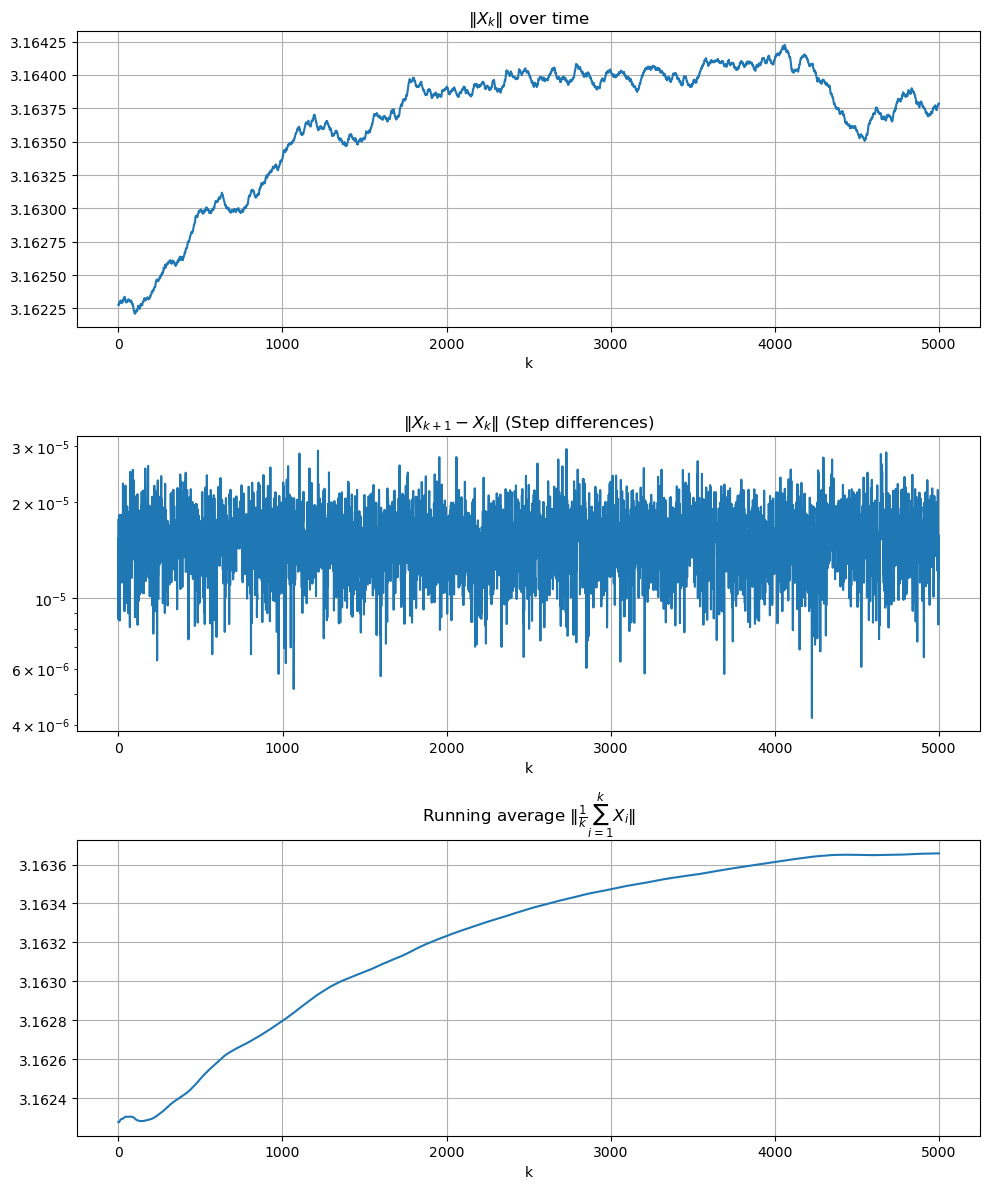

In [17]:

norms = np.linalg.norm(trajectory, axis=1)

diffs = np.linalg.norm(np.diff(trajectory, axis=0), axis=1)

running_avg = np.cumsum(trajectory, axis=0) / np.arange(1, len(trajectory)+1).reshape(-1, 1)
avg_norms = np.linalg.norm(running_avg, axis=1)

fig, axs = plt.subplots(3, 1, figsize=(10, 12))

axs[0].plot(norms)
axs[0].set_title(r"$\|X_k\|$ over time")
axs[0].set_xlabel("k")
axs[0].grid()

axs[1].plot(diffs)
axs[1].set_title(r"$\|X_{k+1} - X_k\|$ (Step differences)")
axs[1].set_xlabel("k")
axs[1].set_yscale("log") 
axs[1].grid()

axs[2].plot(avg_norms)
axs[2].set_title(r"Running average $\| \frac{1}{k} \sum_{i=1}^k X_i \|$")
axs[2].set_xlabel("k")
axs[2].grid()

plt.tight_layout()
plt.show()

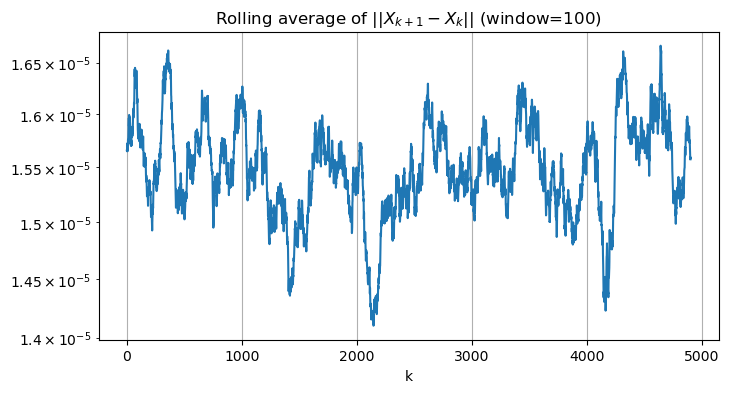

In [18]:
window = 100
rolling_diff = np.convolve(diffs, np.ones(window)/window, mode='valid')

plt.figure(figsize=(8, 4))
plt.plot(rolling_diff)
plt.title(f"Rolling average of $||X_{{k+1}} - X_k||$ (window={window})")
plt.xlabel("k")
plt.yscale("log")
plt.grid(True)
plt.show()

In [19]:
def run_simulation(H, L=1000, n=10, CH=1.0):
    x0 = np.ones(n)
    BH = simulate_fbm_paths(H, L, n)
    scale = 1 / (L**H * np.sqrt(n))
    dBH = scale * (BH[:, :, 1:] - BH[:, :, :-1]) 

    x = x0.copy()
    trajectory = [x.copy()]
    for k in range(1, L + 1):
        W = dBH[:, :, k - 1]
        s = sigma(x)
        scale = 1/np.sqrt(L)
        correction = CH / (k**(2 * H)) * (sigma_prime(x) * s)
        x = x + scale*W @ s + scale*correction
        trajectory.append(x.copy())

    trajectory = np.array(trajectory)
    return trajectory

In [20]:
def analyze_trajectory(trajectory, label=None):
    norms = np.linalg.norm(trajectory, axis=1)
    diffs = np.linalg.norm(np.diff(trajectory, axis=0), axis=1)

    plt.figure(figsize=(12, 4))

    # Plot norm
    plt.subplot(1, 2, 1)
    plt.plot(norms, label=label)
    plt.title("||X_k||")
    plt.xlabel("k")
    plt.grid()

    # Plot step difference
    plt.subplot(1, 2, 2)
    plt.plot(diffs)
    plt.yscale("log")
    plt.title("||X_{k+1} - X_k|| (log scale)")
    plt.xlabel("k")
    plt.grid()

    if label:
        plt.suptitle(f"Convergence Diagnostics for H = {label}")
    plt.tight_layout()
    plt.show()

Simulating for H = 0.26


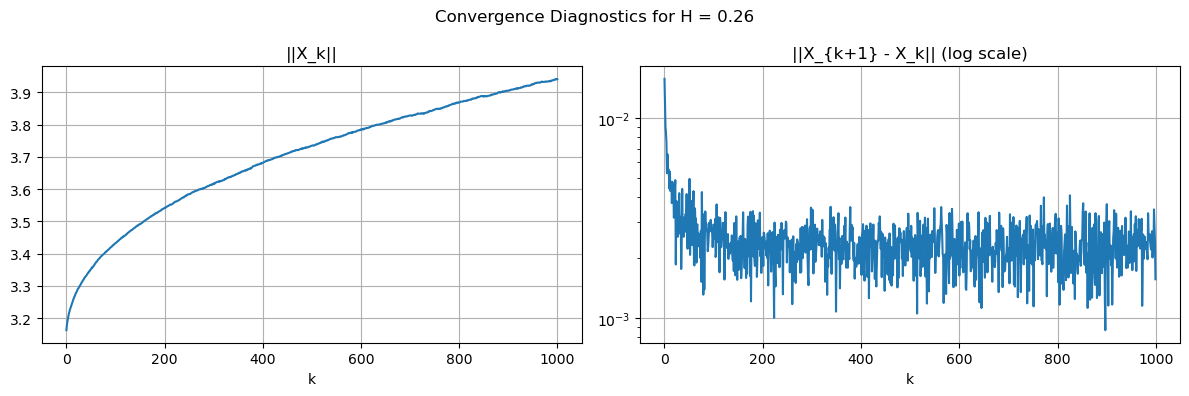

Simulating for H = 0.3


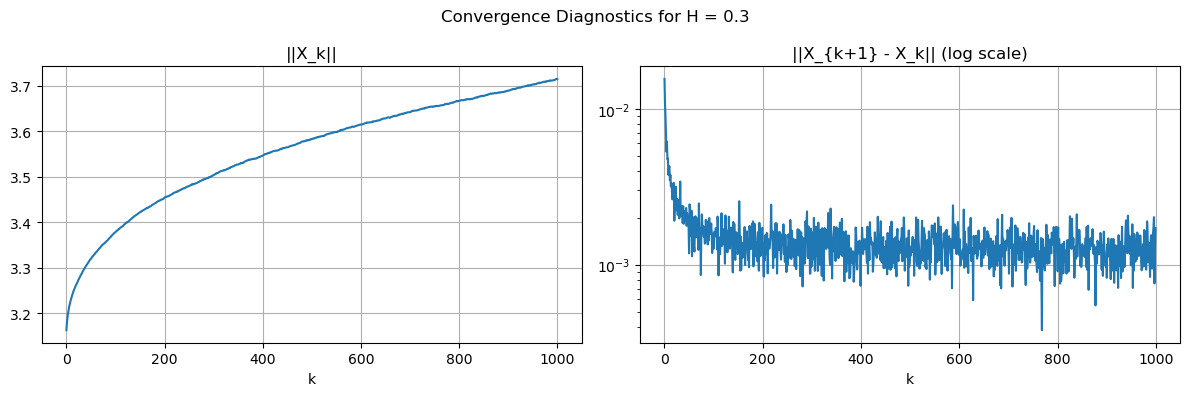

Simulating for H = 0.35


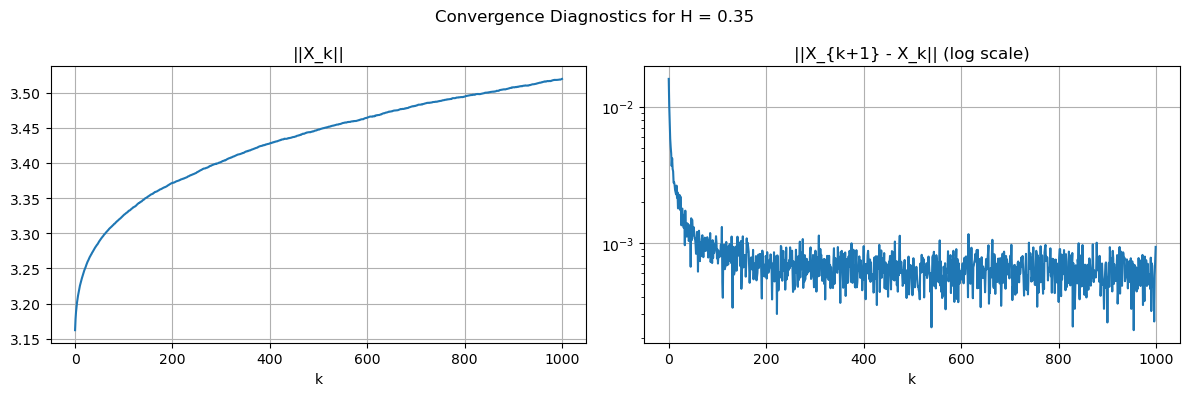

Simulating for H = 0.4


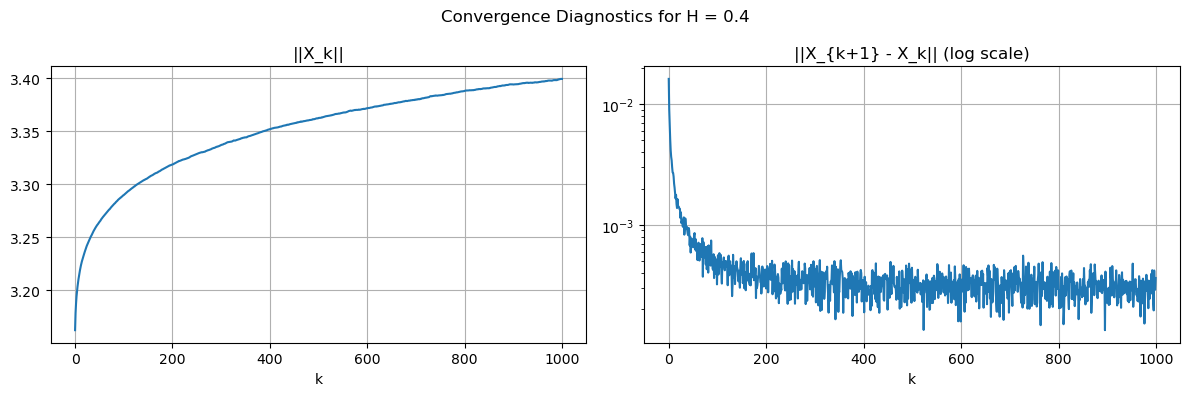

Simulating for H = 0.45


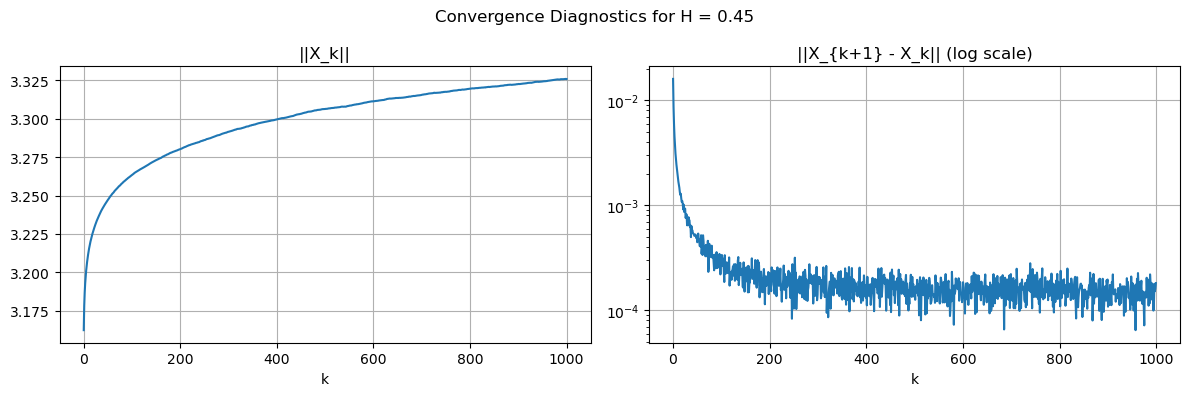

Simulating for H = 0.5


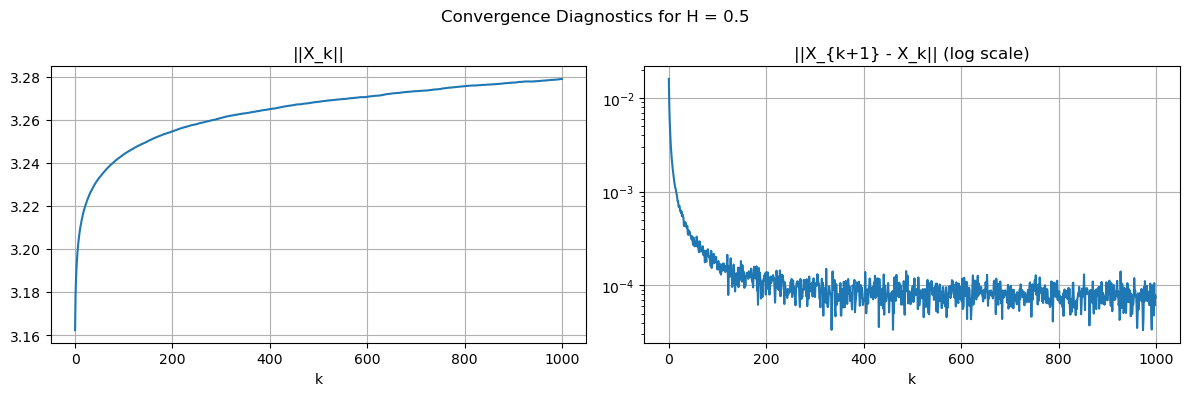

Simulating for H = 0.7


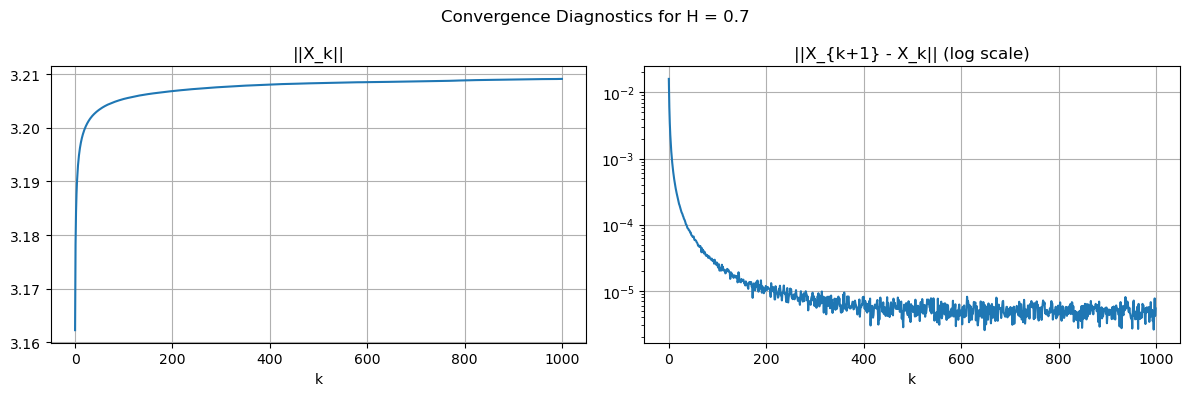

In [21]:
H_list = [0.26, 0.3, 0.35, 0.4, 0.45, 0.5, 0.7]  # between 1/4 and 1/2
for H in H_list:
    print(f"Simulating for H = {H}")
    traj = run_simulation(H, L=1000, n=10, CH=1/6)
    analyze_trajectory(traj, label=H)


In [18]:
pip install fbm

Note: you may need to restart the kernel to use updated packages.


In [22]:
f = FBM(n=L, hurst=0.3, length=T, method='daviesharte')
f

FBM(n=1000, hurst=0.3, length=1.0, method="daviesharte")

In [23]:
f.fbm()

array([ 0.        , -0.19032754, -0.27649387, ...,  0.15585869,
       -0.00590262,  0.03078029])

In [24]:
W= np.diff(f.fbm())
W

array([ 2.93586057e-02,  2.85653309e-02,  1.18715382e-02, -1.26723159e-01,
       -1.28900414e-01,  4.40811715e-02, -9.38954881e-02,  2.93988445e-02,
       -3.07482532e-03,  1.07901446e-01, -1.54990074e-02, -2.08322488e-01,
        6.90699422e-02,  3.65176659e-02,  9.04577376e-02, -2.79719286e-02,
       -1.09093670e-01, -1.73840590e-01,  3.42665774e-01, -1.02019257e-01,
        2.12604431e-01,  8.44640900e-02, -4.64626041e-02, -4.11151886e-02,
       -2.12866008e-01,  5.63608214e-02, -2.26214716e-01, -2.21642670e-02,
       -6.62841663e-02, -6.34586061e-02, -1.99412751e-01, -2.63684489e-01,
        2.14288895e-01,  7.52505074e-03,  3.93197692e-02,  2.45706954e-01,
       -2.89818433e-01, -2.25014422e-02,  2.61049053e-01, -1.47033750e-02,
       -7.95262460e-02,  8.99565502e-03,  9.13414227e-02,  1.00699031e-01,
        7.62429103e-02, -2.55397662e-01,  1.49251385e-01,  6.83472228e-02,
        7.68775007e-02, -9.48117468e-02,  5.19715635e-02,  3.83114530e-02,
        1.70042995e-01, -

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Parameters
n = 10        # Dimension of X
L = 100      # Number of layers
beta_vals = np.linspace(0, 1.3, 100)  # Scaling factors β
H_vals = np.linspace(0.05, 0.97, 100)   # Hurst indices H

def generate_fbm_path(H, L):
    t = np.linspace(0, 1, L + 1)
    cov = 0.5 * (np.add.outer(t**(2*H), t**(2*H)) - np.abs(np.subtract.outer(t, t))**(2*H))
    L_chol = np.linalg.cholesky(cov + 1e-10 * np.eye(L + 1)) 
    Z = np.random.randn(L + 1)
    return L_chol @ Z 

def generate_fbm_weight_tensor(L, n, H):
    W = np.zeros((L, n, n))
    for i in range(n):
        for j in range(n):
            fbm_path = generate_fbm_path(H, L)
            increments = np.diff(fbm_path)
            W[:, i, j] = (L**(H)) * increments
    return W

def simulate_trajectory(H, beta):
    W_tensor = generate_fbm_weight_tensor(L, n, H)
    scale = 1.0 /( (L ** beta)*np.sqrt(n))
    X = np.zeros((L + 1, n))
    X[0] = np.random.randn(n)

    for k in range(L):
        sigma_X = np.tanh(X[k])         
        drift = W_tensor[k] @ sigma_X    
        X[k + 1] = X[k] + scale * drift

    return X

output_diffs = np.zeros((len(beta_vals), len(H_vals)))

for i, beta in enumerate(tqdm(beta_vals, desc="β Loop")):
    for j, H in enumerate(H_vals):
        X = simulate_trajectory(H, beta)
        h0 = X[1]
        hL = X[L - 1]
        output_diffs[i, j] = np.log10(np.linalg.norm(hL - h0) / (np.linalg.norm(h0) + 1e-10))

plt.figure(figsize=(6, 6))
im = plt.imshow(output_diffs, origin='lower', aspect='auto',
                extent=[H_vals[0], H_vals[-1], beta_vals[0], beta_vals[-1]],
                vmin=-1, vmax=1, cmap='coolwarm')
plt.title(r'$\log_{10}(\|h_L - h_0\|/\|h_0\|)$')
plt.ylabel('Scaling β')
plt.xlabel('Regularity H')
plt.colorbar(im, label='Log-Norm Difference')
plt.tight_layout()
plt.show()

β Loop:   1%|          | 1/100 [00:06<10:25,  6.32s/it]


KeyboardInterrupt: 

β Loop: 100%|██████████| 100/100 [06:43<00:00,  4.03s/it]


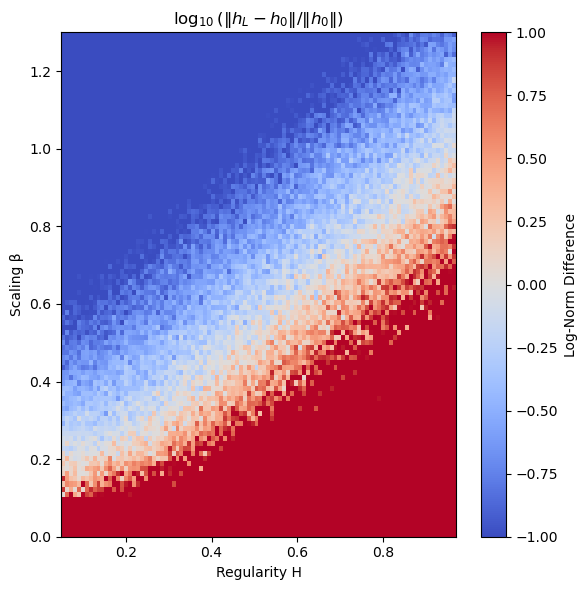

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Parameters
n = 10        # Dimension of X
L = 100      # Number of layers
beta_vals = np.linspace(0, 1.3, 100)  # Scaling factors β
H_vals = np.linspace(0.05, 0.97, 100)   # Hurst indices H

def generate_fbm_path(H, L):
    t = np.linspace(0, 1, L + 1)
    cov = 0.5 * (np.add.outer(t**(2*H), t**(2*H)) - np.abs(np.subtract.outer(t, t))**(2*H))
    L_chol = np.linalg.cholesky(cov + 1e-10 * np.eye(L + 1)) 
    Z = np.random.randn(L + 1)
    return L_chol @ Z 

def generate_fbm_weight_tensor(L, n, H):
    W = np.zeros((L, n, n))
    for i in range(n):
        for j in range(n):
            fbm_path = generate_fbm_path(H, L)
            increments = np.diff(fbm_path)
            W[:, i, j] = (L**(H)) * increments
    return W

def simulate_trajectory(H, beta):
    W_tensor = generate_fbm_weight_tensor(L, n, H)
    scale = 1.0 /( (L ** beta)*np.sqrt(n))
    X = np.zeros((L + 1, n))
    X[0] = np.random.randn(n)

    for k in range(L):        
        drift = W_tensor[k] @ X[k]   
        X[k + 1] = X[k] + scale * drift

    return X

output_diffs = np.zeros((len(beta_vals), len(H_vals)))

for i, beta in enumerate(tqdm(beta_vals, desc="β Loop")):
    for j, H in enumerate(H_vals):
        X = simulate_trajectory(H, beta)
        h0 = X[1]
        hL = X[L - 1]
        output_diffs[i, j] = np.log10(np.linalg.norm(hL - h0) / (np.linalg.norm(h0) + 1e-10))

plt.figure(figsize=(6, 6))
im = plt.imshow(output_diffs, origin='lower', aspect='auto',
                extent=[H_vals[0], H_vals[-1], beta_vals[0], beta_vals[-1]],
                vmin=-1, vmax=1, cmap='coolwarm')
plt.title(r'$\log_{10}(\|h_L - h_0\|/\|h_0\|)$')
plt.ylabel('Scaling β')
plt.xlabel('Regularity H')
plt.colorbar(im, label='Log-Norm Difference')
plt.tight_layout()
plt.show()

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Parameters
n = 10       # Dimension of X
L = 100      # Number of layers
beta_vals = np.linspace(0.0, 1.3, 100)  # Scaling factors β
H_vals = np.linspace(0.05, 0.97, 100)   # Hurst indices H

def generate_fbm_path(H, L):
    t = np.linspace(0, 1, L + 1)
    cov = 0.5 * (np.add.outer(t**(2*H), t**(2*H)) - np.abs(np.subtract.outer(t, t))**(2*H))
    L_chol = np.linalg.cholesky(cov+ 1e-10 * np.eye(L + 1))
    Z = np.random.randn(L + 1)
    return L_chol @ Z 

def generate_fbm_weight_tensor(L, n, H):
    W = np.zeros((L, n, n))
    for i in range(n):
        for j in range(n):
            fbm_path = generate_fbm_path(H, L)
            increments = np.diff(fbm_path)
            W[:, i, j] = increments*(L**(-H))
    return W

def simulate_trajectory(H, beta):
    W_tensor = generate_fbm_weight_tensor(L, n, H)
    scale = 1.0 / ((L ** beta)*np.sqrt(n))
    X = np.zeros((L + 1, n))
    X[0] = np.random.randn(n)
    C_H = 1/2  # correction constant from the paper

    for k in range(L):
        sigma_X = np.tanh(X[k])           
        drift = W_tensor[k] @ sigma_X        
        sigma_prime = 1 - sigma_X**2
        correction = C_H * (sigma_prime * sigma_X)/((L)**(2*beta))

        X[k + 1] = X[k] + scale * drift + correction

    return X


output_diffs = np.zeros((len(beta_vals), len(H_vals)))

for i, beta in enumerate(tqdm(beta_vals, desc="β Loop")):
    for j, H in enumerate(H_vals):
        X = simulate_trajectory(H, beta)
        h0 = X[1]
        hL = X[L - 1]
        output_diffs[i, j] = np.log10(np.linalg.norm(hL - h0) / (np.linalg.norm(h0) + 1e-10))


plt.figure(figsize=(6, 6))
im = plt.imshow(output_diffs, origin='lower', aspect='auto',
                extent=[H_vals[0], H_vals[-1], beta_vals[0], beta_vals[-1]],
                vmin=-1, vmax=1, cmap='coolwarm')
plt.title(r'$\log_{10}(\|h_L - h_0\|/\|h_0\|)$ with correction')
plt.ylabel('Scaling β')
plt.xlabel('Regularity H')
plt.colorbar(im, label='Log-Norm Difference')
plt.tight_layout()
plt.show()


β Loop:   1%|          | 1/100 [01:12<1:59:13, 72.26s/it]


KeyboardInterrupt: 

β Loop: 100%|██████████| 100/100 [07:01<00:00,  4.21s/it]


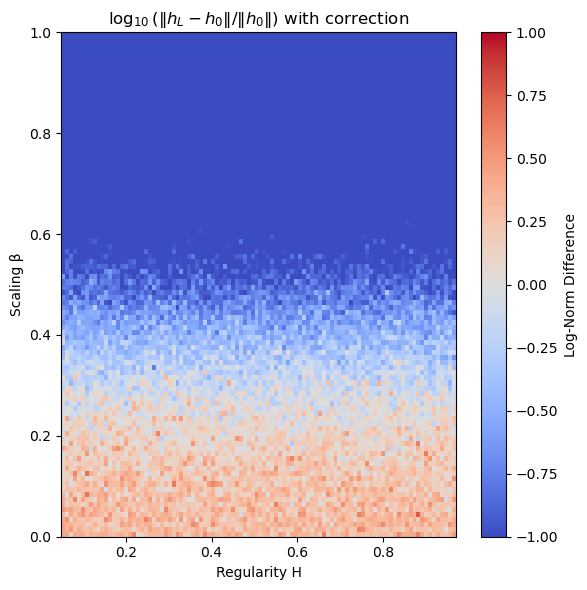

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Parameters
n = 10       # Dimension of X
L = 100      # Number of layers
beta_vals = np.linspace(0.0, 1., 100)  # Scaling factors β
H_vals = np.linspace(0.05, 0.97, 100)   # Hurst indices H

def generate_fbm_path(H, L):
    t = np.linspace(0, 1, L + 1)
    cov = 0.5 * (np.add.outer(t**(2*H), t**(2*H)) - np.abs(np.subtract.outer(t, t))**(2*H))
    L_chol = np.linalg.cholesky(cov+ 1e-10 * np.eye(L + 1))
    Z = np.random.randn(L + 1)
    return L_chol @ Z 

def generate_fbm_weight_tensor(L, n, H):
    W = np.zeros((L, n, n))
    for i in range(n):
        for j in range(n):
            fbm_path = generate_fbm_path(H, L)
            increments = np.diff(fbm_path)
            W[:, i, j] = increments*L**H
    return W

def simulate_trajectory(H, beta):
    W_tensor = generate_fbm_weight_tensor(L, n, H)
    scale = 1.0 / ((L ** beta)*np.sqrt(n))
    X = np.zeros((L + 1, n))
    X[0] = np.random.randn(n)
    C_H = 1/2  # correction constant from the paper

    for k in range(L):
        sigma_X = np.tanh(X[k])           
        drift = W_tensor[k] @ sigma_X        
        sigma_prime = 1 - sigma_X**2
        correction = C_H * (sigma_prime * sigma_X)/((L)**(2*beta))

        X[k + 1] = X[k] + scale * drift + correction

    return X


output_diffs = np.zeros((len(beta_vals), len(H_vals)))

for i, beta in enumerate(tqdm(beta_vals, desc="β Loop")):
    for j, H in enumerate(H_vals):
        X = simulate_trajectory(H, beta)
        h0 = X[1]
        hL = X[L - 1]
        output_diffs[i, j] = np.log10(np.linalg.norm(hL - h0) / (np.linalg.norm(h0) + 1e-10))


plt.figure(figsize=(6, 6))
im = plt.imshow(output_diffs, origin='lower', aspect='auto',
                extent=[H_vals[0], H_vals[-1], beta_vals[0], beta_vals[-1]],
                vmin=-1, vmax=1, cmap='coolwarm')
plt.title(r'$\log_{10}(\|h_L - h_0\|/\|h_0\|)$ with correction')
plt.ylabel('Scaling β')
plt.xlabel('Regularity H')
plt.colorbar(im, label='Log-Norm Difference')
plt.tight_layout()
plt.show()

β Loop: 100%|██████████| 100/100 [00:17<00:00,  5.70it/s]


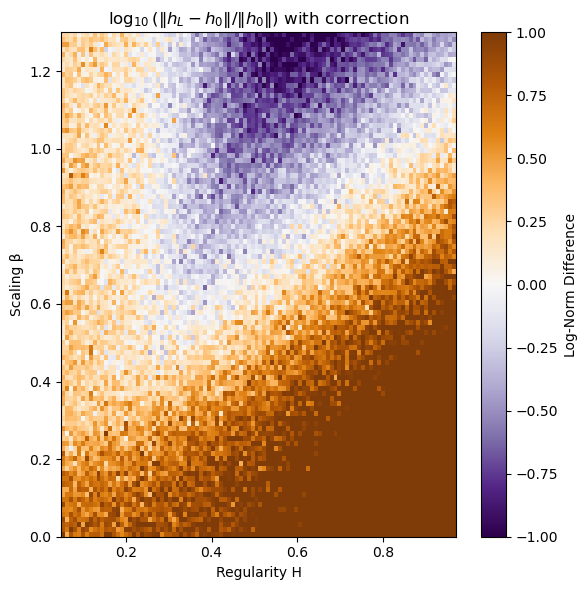

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from functools import lru_cache

# Parameters
n = 10       # Dimension of X
L = 100      # Number of layers
beta_vals = np.linspace(0.0, 1.3, 100)  # Scaling factors β
H_vals = np.linspace(0.05, 0.97, 100)   # Hurst indices H

@lru_cache(maxsize=None)
def get_cholesky(H):
    t = np.linspace(0, 1, L + 1)
    cov = 0.5 * (np.add.outer(t**(2 * H), t**(2 * H)) - np.abs(np.subtract.outer(t, t))**(2 * H))
    return np.linalg.cholesky(cov + 1e-10 * np.eye(L + 1))

def generate_fbm_weight_tensor(L, n, H):
    L_chol = get_cholesky(H)
    Z = np.random.randn(L + 1, n, n)  # Batch noise generation
    fbm_paths = np.tensordot(L_chol, Z, axes=([1], [0]))  # Shape: (L+1, n, n)
    increments = np.diff(fbm_paths, axis=0)  # Shape: (L, n, n)
    return increments*L**H 

def simulate_trajectory(H, beta):
    W_tensor = generate_fbm_weight_tensor(L, n, H)
    scale = 1.0 / ((L ** beta))
    X = np.zeros((L + 1, n))
    X[0] = np.random.randn(n)
    C_H = 1 / 2  # Correction constant from paper

    for k in range(L):
        sigma_X = np.tanh(X[k])
        drift = W_tensor[k] @ sigma_X
        sigma_prime = 1 - sigma_X ** 2
        correction = C_H * (sigma_prime * sigma_X) / (L ** (2 * H))
        X[k + 1] = X[k] + scale * drift + correction

    return X

output_diffs = np.zeros((len(beta_vals), len(H_vals)))

for i, beta in enumerate(tqdm(beta_vals, desc="β Loop")):
    for j, H in enumerate(H_vals):
        X = simulate_trajectory(H, beta)
        h0 = X[1]
        hL = X[L - 1]
        output_diffs[i, j] = np.log10(np.linalg.norm(hL - h0) / (np.linalg.norm(h0) + 1e-10))

# Plotting
plt.figure(figsize=(6, 6))
im = plt.imshow(output_diffs, origin='lower', aspect='auto',
                extent=[H_vals[0], H_vals[-1], beta_vals[0], beta_vals[-1]],
                vmin=-1, vmax=1, cmap = 'PuOr_r'  # reversed orange-purple diverging map
)
plt.title(r'$\log_{10}(\|h_L - h_0\|/\|h_0\|)$ with correction')
plt.ylabel('Scaling β')
plt.xlabel('Regularity H')
plt.colorbar(im, label='Log-Norm Difference')
plt.tight_layout()
plt.show()


β Loop: 100%|██████████| 100/100 [00:13<00:00,  7.28it/s]


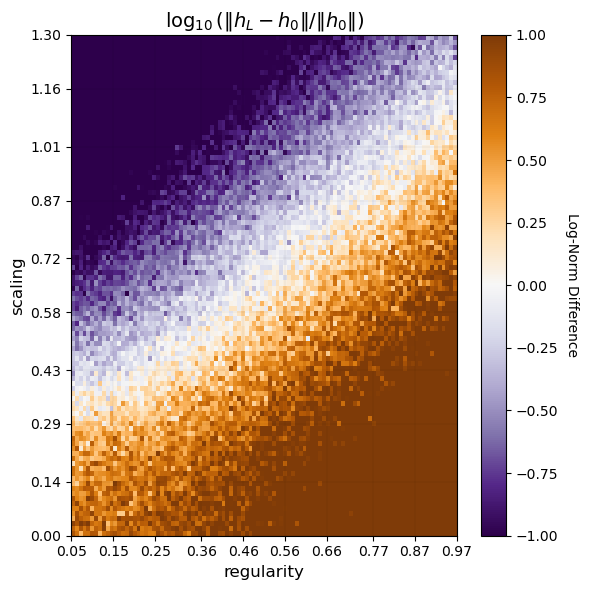

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from functools import lru_cache

# Parameters
n = 10       # Dimension of X
L = 100     # Number of layers
beta_vals = np.linspace(0.0, 1.3, 100)  # Scaling factors β
H_vals = np.linspace(0.05, 0.97, 100)   # Hurst indices H

@lru_cache(maxsize=None)
def get_cholesky(H):
    t = np.linspace(0, 1, L + 1)
    cov = 0.5 * (np.add.outer(t**(2 * H), t**(2 * H)) - np.abs(np.subtract.outer(t, t))**(2 * H))
    return np.linalg.cholesky(cov + 1e-10 * np.eye(L + 1))

def generate_fbm_weight_tensor(L, n, H):
    L_chol = get_cholesky(H)
    Z = np.random.randn(L + 1, n, n)  # Batch noise generation
    fbm_paths = np.tensordot(L_chol, Z, axes=([1], [0]))  # Shape: (L+1, n, n)
    increments = np.diff(fbm_paths, axis=0)  # Shape: (L, n, n)
    return increments*L**H

def simulate_trajectory(H, beta):
    W_tensor = generate_fbm_weight_tensor(L, n, H)
    scale = 1.0 / (((L ** beta)))
    X = np.zeros((L + 1, n))
    X[0] = np.random.randn(n)
    C_H = 1 / 2  # Correction constant from paper

    for k in range(L):
        sigma_X = np.tanh(X[k])
        drift = W_tensor[k] @ sigma_X
        X[k + 1] = X[k] + scale * drift

    return X

output_diffs = np.zeros((len(beta_vals), len(H_vals)))

for i, beta in enumerate(tqdm(beta_vals, desc="β Loop")):
    for j, H in enumerate(H_vals):
        X = simulate_trajectory(H, beta)
        h0 = X[1]
        hL = X[L - 1]
        output_diffs[i, j] = np.log10(np.linalg.norm(hL - h0) / (np.linalg.norm(h0) + 1e-10))

# Plotting
plt.figure(figsize=(6, 6))
im = plt.imshow(output_diffs, origin='lower', aspect='auto',
                extent=[H_vals[0], H_vals[-1], beta_vals[0], beta_vals[-1]],
                vmin=-1, vmax=1, cmap='PuOr_r')
plt.xticks(np.round(np.linspace(H_vals[0], H_vals[-1], 10), 2), fontsize=10)
plt.yticks(np.round(np.linspace(beta_vals[0], beta_vals[-1], 10), 2), fontsize=10)
plt.title(r'$\log_{10}(\|h_L - h_0\| / \|h_0\|)$', fontsize=14)
plt.xlabel('regularity', fontsize=12)
plt.ylabel('scaling', fontsize=12)
plt.grid(color='k', linestyle='-', linewidth=0.1, alpha=0.4)
cbar = plt.colorbar(im)
cbar.set_label('Log-Norm Difference', rotation=270, labelpad=15)
plt.tight_layout()
plt.show()

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from tqdm.notebook import tqdm

In [37]:
def generate_fbm(depth, hurst):
    t = np.arange(depth + 1)
    cov = 0.5 * (np.add.outer(t**(2*hurst), t**(2*hurst)) - np.abs(np.subtract.outer(t, t))**(2*hurst))
    chol = np.linalg.cholesky(cov + 1e-10 * np.eye(depth + 1))
    return chol @ np.random.randn(depth + 1)

def create_fbm_weights(depth, width, hurst):
    weights = torch.zeros(depth, width, width)
    for i in range(width):
        for j in range(width):
            fbm_path = generate_fbm(depth, hurst)
            increments = np.diff(fbm_path)
            weights[:, i, j] = torch.Tensor(increments) / np.sqrt(width)
    return weights

class SimpleResNet(nn.Module):
    def __init__(self, input_dim, depth, width, hurst=0.5, scaling=0.5, activation='Tanh'):
        super().__init__()
        self.depth = depth
        self.width = width
        self.activation = getattr(nn, activation)()
        self.init = nn.Linear(input_dim, width, bias=False)
        self.final = nn.Linear(width, 1, bias=False)
        self.scaling_weight = torch.full((depth,), 1.0 / (depth ** scaling))
        self.outer_weights = nn.ModuleList([
            nn.Linear(width, width, bias=False) for _ in range(depth)
        ])
        fbm_weights = create_fbm_weights(depth, width, hurst)
        for k in range(depth):
            self.outer_weights[k].weight = torch.nn.Parameter(fbm_weights[k])

    def reset_scaling(self, beta):
        self.scaling_weight = torch.full((self.depth,), 1.0 / (self.depth ** beta))

    def forward_hidden_state(self, hidden_state):
        for k in range(self.depth):
            hidden_state = hidden_state + self.scaling_weight[k] * self.outer_weights[k](self.activation(hidden_state))
        return hidden_state

    def forward(self, x):
        h0 = self.init(x)
        hL = self.forward_hidden_state(h0)
        return self.final(hL)

In [38]:
def run_hidden_state_experiment(depth=1000, width=40, input_dim=40,
                                 grid_scaling=np.linspace(0, 1.3, 50),
                                 grid_reg=np.linspace(0.05, 0.97, 50),
                                 trials_per_point=1):
    results = []

    for H in tqdm(grid_reg, desc="H Loop"):
        for β in grid_scaling:
            log_diffs = []
            for _ in range(trials_per_point):
                model = SimpleResNet(input_dim=input_dim, depth=depth,
                                     width=width, hurst=H, scaling=β)
                x0 = torch.randn(1, input_dim)
                h0 = model.init(x0)
                hL = model.forward_hidden_state(h0)
                diff = torch.norm(hL - h0) / (torch.norm(h0) + 1e-10)
                log_diffs.append(float(torch.log10(diff)))
            results.append({
                'scaling': β,
                'regularity': H,
                'log_hidden_state_difference': np.mean(log_diffs)
            })
    return results

In [39]:
def plot_hidden_state_heatmap(results, cmap='twilight_shifted'):
    import pandas as pd
    df = pd.DataFrame(results)
    df_pivot = df.pivot_table(index='scaling', columns='regularity',
                               values='log_hidden_state_difference', dropna=False)
    df_pivot.index = np.round(df_pivot.index.astype(float), 2)
    df_pivot.columns = np.round(df_pivot.columns.astype(float), 2)
    df_pivot.replace(np.inf, np.nan, inplace=True)
    df_pivot.fillna(16, inplace=True)

    plt.figure(figsize=(7, 6))
    sns.heatmap(df_pivot[::-1], vmin=-1, vmax=1, center=0,
                xticklabels=5, yticklabels=6, square=True, cmap=cmap)

    # Overlay β = H line
    H_vals = df_pivot.columns.values
    plt.plot(H_vals, H_vals[::-1], linestyle='--', color='black', linewidth=1.2, label=r'$\beta = H$')
    plt.legend(loc='upper left')

    plt.xlabel("regularity (H)")
    plt.ylabel("scaling (β)")
    plt.title(r'$\log_{10}(\|h_L - h_0\| / \|h_0\|)$')
    plt.show()

H Loop:   0%|          | 0/50 [00:00<?, ?it/s]

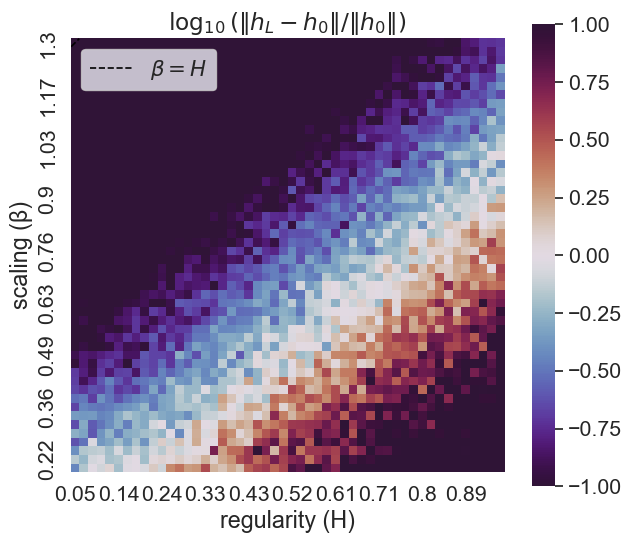

In [43]:
results = run_hidden_state_experiment(
    depth=100,
    width=10,
    input_dim=10,
    grid_scaling=np.linspace(0.2, 1.3, 50),
    grid_reg=np.linspace(0.05, 0.97, 50),
    trials_per_point=1  # increase to 3–5 for smoother results
)
plot_hidden_state_heatmap(results)


In [44]:
pip install pytorch_lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.0/823.0 kB 11.4 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.9/960.9 kB 19.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pytorch_lightning as pl
import torch


def get_prediction(data, model: pl.LightningModule, device):
    model.eval() # Deactivates gradient graph construction during eval.
    data = data.to(device)
    model.to(device)
    probabilities = torch.softmax(model(data), dim=1)
    predicted_class = torch.argmax(probabilities, dim=1)
    return predicted_class, probabilities


def get_true_targets_predictions(test_dl, model, device):
    true_targets, predictions = [], []
    for batch in iter(test_dl):
        data, target = batch
        true_targets.extend(target)
        prediction, _ = get_prediction(data, model, device)
        predictions.extend(prediction.cpu())
    return true_targets, predictions


def get_eval_loss(test_dl, model, device):
    model.eval()
    loss = 0
    for n, batch in enumerate(test_dl):
        data, target = batch
        logits = model(data.to(device))
        loss += model.loss(logits, target.to(device))
    return loss / n


def generate_fbm(N, H):
    '''
    Generates sample paths of fractional Brownian Motion using the Davies Harte method

    args:
        N:      number of time steps within timeframe
        H:      Hurst parameter
    '''
    gamma = lambda k, H: 0.5 * (
                np.abs(k - 1) ** (2 * H) - 2 * np.abs(k) ** (2 * H) + np.abs(
            k + 1) ** (2 * H))
    g = [gamma(k, H) for k in range(0, N)]
    r = g + [0] + g[::-1][0:N - 1]

    # Step 1 (eigenvalues)
    j = np.arange(0, 2 * N)
    k = 2 * N - 1
    lk = np.fft.fft(
        r * np.exp(2 * np.pi * complex(0, 1) * k * j * (1 / (2 * N))))[::-1]

    # Step 2 (get random variables)
    Vj = np.zeros((2 * N, 2), dtype=complex)
    Vj[0, 0] = np.random.standard_normal()
    Vj[N, 0] = np.random.standard_normal()

    for i in range(1, N):
        Vj1 = np.random.standard_normal()
        Vj2 = np.random.standard_normal()
        Vj[i][0] = Vj1
        Vj[i][1] = Vj2
        Vj[2 * N - i][0] = Vj1
        Vj[2 * N - i][1] = Vj2

    # Step 3 (compute Z)
    wk = np.zeros(2 * N, dtype=complex)
    wk[0] = np.sqrt((lk[0] / (2 * N))) * Vj[0][0]
    wk[1:N] = np.sqrt(lk[1:N] / (4 * N)) * (
                (Vj[1:N].T[0]) + (complex(0, 1) * Vj[1:N].T[1]))
    wk[N] = np.sqrt((lk[0] / (2 * N))) * Vj[N][0]
    wk[N + 1:2 * N] = np.sqrt(lk[N + 1:2 * N] / (4 * N)) * (
                np.flip(Vj[1:N].T[0]) - (
                    complex(0, 1) * np.flip(Vj[1:N].T[1])))

    Z = np.fft.fft(wk)
    fGn = Z[0:N]
    fBm = np.cumsum(fGn) * (N ** (-H))
    path = np.array([0] + list(fBm))
    return path, fGn


def rbf_kernel(x1, x2, variance):
    return np.exp(-1 * ((x1-x2) ** 2) / (2*variance))


def gram_matrix(depth, variance):
    xs = np.linspace(0, 1, depth + 1)
    return [[rbf_kernel(x1, x2, variance) for x2 in xs] for x1 in xs]

In [2]:
from abc import ABC, abstractmethod

import numpy as np
import pytorch_lightning as pl
import torch
from torch import nn


def create_linear_layers_rbf(depth: int, width: int, regularity: float) -> nn.Sequential:
    mean = [0] * (depth + 1)
    gram = gram_matrix(depth, regularity)
    gp = np.random.default_rng().multivariate_normal(mean, gram, (width, width))
    increments = gp[:, :, 1:] - gp[:, :, :-1]
    weights = torch.Tensor(increments / (np.mean(np.std(increments, axis=(0, 1))) * np.sqrt(width)))
    layers = [nn.Linear(width, width, bias=False) for _ in range(depth)]
    for k in range(depth):
        layers[k].weight = torch.nn.Parameter(weights[:, :, k])
    return nn.Sequential(*layers)


def create_linear_layers_fbm(depth: int, width: int, hurst_index: float) -> nn.Sequential:
    weights = torch.zeros(depth, width, width)
    for i in range(width):
        for j in range(width):
            weights[:, i, j] = torch.Tensor(generate_fbm(depth, hurst_index)[1] / np.sqrt(width))
    layers = [nn.Linear(width, width) for _ in range(depth)]
    for k in range(depth):
        layers[k].weight = torch.nn.Parameter(weights[k])
        layers[k].bias = torch.nn.Parameter(torch.zeros(width,))
    return nn.Sequential(*layers)


def create_linear_layer(in_features: int, out_features: int, bias: bool = True) -> nn.Linear:
    layer = nn.Linear(in_features, out_features, bias=bias)
    length = torch.sqrt(torch.Tensor([3. / in_features]))
    layer.weight = nn.Parameter(2 * length * torch.rand((out_features, in_features)) - length)
    if bias:
        layer.bias = nn.Parameter(2 * length * torch.rand((out_features,)) - length)
    return layer


class ResNet(pl.LightningModule, ABC):
    def __init__(self, first_coord: int, final_width: int, **model_config: dict):
        super().__init__()
        self.initial_width = first_coord
        self.final_width = final_width
        self.model_config = model_config
        self.width = model_config['width']
        self.depth = model_config['depth']
        self.activation = getattr(nn, model_config['activation'])()

        self.scaling_weight = torch.full((self.depth,), 1 / (float(self.depth) ** model_config['scaling']))
        self.init = create_linear_layer(self.initial_width, self.width, bias=False)
        self.final = create_linear_layer(self.width, self.final_width, bias=False)
        self.loss = nn.CrossEntropyLoss()

    def reset_scaling(self, scaling: float):
        self.scaling_weight = torch.full((self.depth,), 1 / (float(self.depth) ** scaling))

    @abstractmethod
    def forward_hidden_state(self, hidden_state):
        ...

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        hidden_state = self.init(x)
        hidden_state = self.forward_hidden_state(hidden_state)
        return self.final(hidden_state)

    def training_step(self, batch, batch_no):
        self.train()
        data, target = batch
        logits = self(data)
        loss = self.loss(logits, target)

    # Record the loss for this step
        if not hasattr(self, "loss_history"):
            self.loss_history = []
        self.loss_history.append(loss.detach().cpu().item())

        self.log("train/loss", loss, on_step=True, on_epoch=True)
        return loss


    def configure_optimizers(self):
        return torch.optim.SGD(self.parameters(), lr=self.model_config['lr'])


class SimpleResNet(ResNet):
    def __init__(self, first_coord: int, final_width: int, **model_config: dict):
        super().__init__(first_coord, final_width, **model_config)

        if model_config['regularity']['type'] == 'iid':
            self.outer_weights = nn.Sequential(
                *[create_linear_layer(self.width, self.width, bias=False) for _ in range(self.depth)])
        elif model_config['regularity']['type'] == 'fbm':
            self.outer_weights = create_linear_layers_fbm(self.depth, self.width, model_config['regularity']['value'])
        elif model_config['regularity']['type'] == 'rbf':
            self.outer_weights = create_linear_layers_rbf(self.depth, self.width, model_config['regularity']['value'])
        else:
            raise ValueError("argument regularity['type'] should be one of 'iid', 'fbm', 'rbf'")

    def forward_hidden_state(self, hidden_state: torch.Tensor) -> torch.Tensor:
        for k in range(self.depth):
            pre_activation = hidden_state
            activated = self.activation(pre_activation)
            activated_derivative = 1.0 - activated**2  # tanh'
            correction_term = activated_derivative * activated
            hurst = self.model_config['regularity']['value']
            ch_scale = 1.0 / (2 * (self.depth ** (2 * hurst)))
            hidden_state = hidden_state + (
                self.scaling_weight[k] * self.outer_weights[k](activated)
            ) 
            #+ ch_scale * correction_term
        return hidden_state


class FullResNet(ResNet):
    def __init__(self, first_coord: int, final_width: int, **model_config: dict):
        super().__init__(first_coord, final_width, **model_config)

        if model_config['regularity']['type'] == 'iid':
            self.inner_weights = nn.Sequential(
                *[create_linear_layer(self.width, self.width, bias=False) for _ in range(self.depth)])
            self.outer_weights = nn.Sequential(
                *[create_linear_layer(self.width, self.width, bias=False) for _ in range(self.depth)])
        elif model_config['regularity']['type'] == 'fbm':
            self.inner_weights = create_linear_layers_fbm(self.depth, self.width, model_config['regularity']['value'])
            self.outer_weights = create_linear_layers_fbm(self.depth, self.width, model_config['regularity']['value'])
        elif model_config['regularity']['type'] == 'rbf':
            self.inner_weights = create_linear_layers_rbf(self.depth, self.width, model_config['regularity']['value'])
            self.outer_weights = create_linear_layers_rbf(self.depth, self.width, model_config['regularity']['value'])
        else:
            raise ValueError("argument regularity['type'] should be one of 'iid', 'fbm', 'rbf'")

        self.final = create_linear_layer(self.width, self.final_width, bias=False)
        self.loss = nn.CrossEntropyLoss()

    def forward_hidden_state(self, hidden_state: torch.Tensor) -> torch.Tensor:
        for k in range(self.depth):
            pre_activation = self.inner_weights[k](hidden_state)
            activated = self.activation(pre_activation)
            activated_derivative = 1.0 - activated**2  # tanh'
            correction_term = activated_derivative * activated
            hurst = self.model_config['regularity']['value']
            ch_scale = 1.0 / (2 * (self.depth ** (2 * hurst)))
            hidden_state = hidden_state + (
                self.scaling_weight[k] * self.outer_weights[k](activated)
            ) 
            #+ ch_scale * correction_term
        return hidden_state


In [3]:

scaling_initialization_exp_iid = {
    'name': 'scaling_initialization_exp',
    'model': 'FullResNet',
    'model-config': {
        'width': 10,
        'activation': 'Tanh',
        'regularity': {'type': 'iid'}
    },
    'niter': 50,
    'dim_input': 64,
    'nb_classes': 1,
}

scaling_initialization_exp_smooth = {
    'name': 'scaling_initialization_exp',
    'model': 'FullResNet',
    'model-config': {
        'width': 10,
        'activation': 'Tanh',
        'regularity': {
            'type': 'rbf',
            'value': 0.01
        }
    },
    'niter': 50,
    'dim_input': 64,
    'nb_classes': 1,
}

histogram_initialization_exp = {
    'name': 'histogram_initialization_exp',
    'model': 'FullResNet',
    'model-config': {
        'width': 10,
        'depth': 10**3,
        'scaling': 0.5,
        'activation': 'Tanh',
        'regularity': {'type': 'iid'}
    },
    'niter': 10 ** 2,
    'dim_input': 64,
    'nb_classes': 1,
}

scaling_regularity_initialization_exp = {
    'name': 'scaling_regularity_initialization_exp',
    'model': 'FullResNet',
    'model-config': {
        'width': 10,
        'depth': 100,
        'scaling': 0.5,
        'activation': 'Tanh',
        'regularity': {}
    },
    'niter_reg': 5,
    'niter_scaling': 10,
    'dim_input': 64,
    'nb_classes': 1,
}

weights_after_training = {
    'name': 'weights-after-training',
    'model': 'SimpleResNet',
    'dataset': 'MNIST',
    'model-config': {
        'width': 10,
        'depth': 100,
        'activation': 'Tanh',              # 'ReLU' or 'Tanh'
        'lr': 0.01,
        'step_lr': 1000
    },
    'epochs': 100,
    'n_workers': 5
}

perf_weights_regularity = {
    'name': 'perf-weights-regularity-dataset',
    'model': 'SimpleResNet',
    'dataset': 'MNIST',
    'model-config': {
        'width': 10,
        'depth': 100,
        'activation': 'Tanh',              # 'ReLU' or 'Tanh'
        'scaling': 1.,
        'regularity':
            {
                'type': 'fbm',
                'value': 0.5
            },
        'lr': 0.001,
        'step_lr': 5
    },
    'epochs': 5,
    'n_workers': 5
}

/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


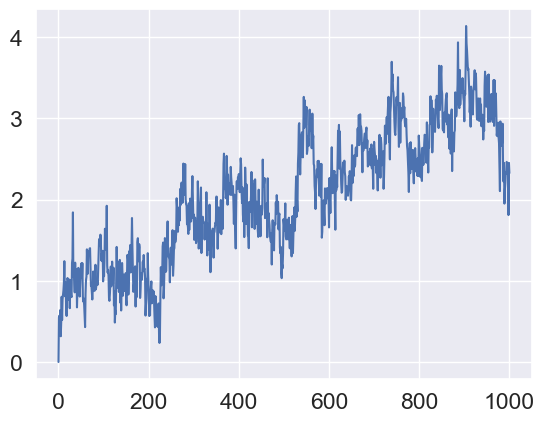

/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


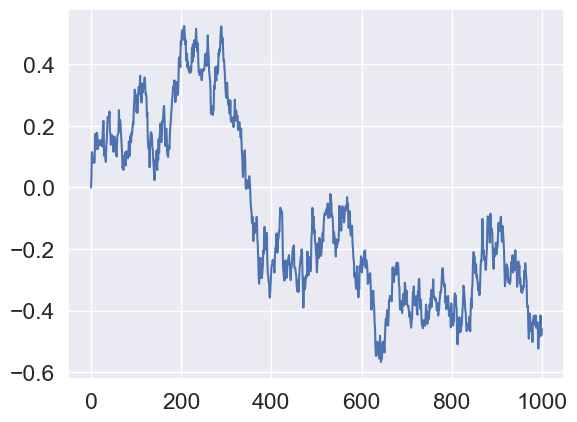

/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


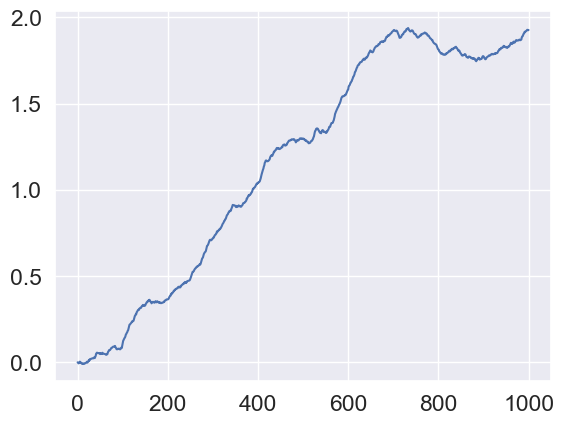

0.05
0.0684
0.0868
0.1052
0.1236
0.14200000000000002
0.1604
0.17880000000000001
0.1972
0.2156
0.23399999999999999
0.2524
0.2708
0.2892
0.3076
0.326
0.3444
0.36279999999999996
0.3812
0.3996
0.418
0.43639999999999995
0.4548
0.4732
0.4916
0.51
0.5284
0.5468000000000001
0.5652
0.5836
0.6020000000000001
0.6204000000000001
0.6388
0.6572
0.6756
0.6940000000000001
0.7124
0.7308
0.7492000000000001
0.7676000000000001
0.786
0.8044
0.8228
0.8412000000000001
0.8596
0.878
0.8964000000000001
0.9148000000000001
0.9332
0.9516
0.97


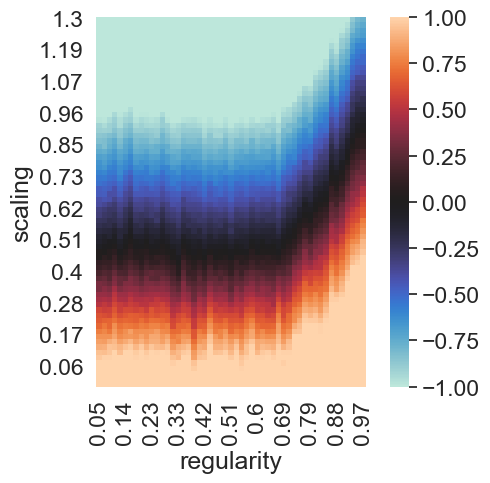

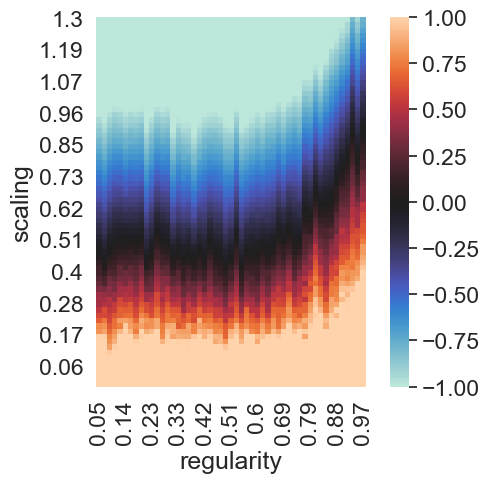

In [11]:
import distutils.spawn
import os
from typing import Optional

from matplotlib import rc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch

sns.set(font_scale=1.5)

if distutils.spawn.find_executable('latex'):
    rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
    rc('text', usetex=True)


def run_experiment(config: dict, grid_scaling: list, grid_reg: list) -> list:
    """ Loop over a grid of initializations and scaling values, compute ratios
    between norms of the output and the input, as well as their respective
    gradients.

    :param config: configuration of the experiment
    :param grid_scaling: all values of scaling to loop over
    :param grid_reg: regularity of the process used to initialize the weights
    of the network
    :return:
    """

    results = []
    for reg in grid_reg:
        print(reg)
        for k in range(config['niter_reg']):
            model_config = config['model-config']
            model_config['regularity']['type'] = 'fbm'
            model_config['regularity']['value'] = reg
            model = FullResNet(
                config['dim_input'], config['nb_classes'], **model_config)

            for scaling in grid_scaling:
                model.reset_scaling(scaling)
                for j in range(config['niter_scaling']):

                    x0 = torch.rand((1, config['dim_input']))
                    target = torch.rand((1,))

                    h_0 = model.init(x0)
                    h_L = model.forward_hidden_state(h_0)
                    output = model.final(h_L)

                    h_0.retain_grad()
                    h_L.retain_grad()

                    loss = torch.norm(output - target) ** 2
                    loss.backward()

                    h_0_grad = h_0.grad
                    h_L_grad = h_L.grad

                    results.append({
                        'scaling': scaling,
                        'regularity': reg,
                        'hidden_state_difference': float(
                            torch.norm(h_L - h_0) / torch.norm(h_0)),
                        'gradient_difference': float(
                            torch.norm(h_L_grad - h_0_grad) / torch.norm(
                                h_L_grad)),
                        })
    return results


def plot_results(results: list, filepath: Optional[str] = 'figures'):
    """Plot heatmaps which describes the hidden state and gradient norms,
    as a function of scaling and initialization regularity.
    See Figure 7 of the paper.

    :param results: list of results
    :param filepath: path to the folder where the figures should be saved
    :return:
    """
    df = pd.DataFrame(results)
    df.columns = ['scaling', 'regularity', 'hidden_state_difference',
                  'gradient_difference']
    df['log_hidden_state_difference'] = np.log10(df['hidden_state_difference'])
    df['log_gradients_difference'] = np.log10(df['gradient_difference'])

    df1 = df.pivot_table(index='scaling', columns='regularity',
                         values='log_hidden_state_difference', dropna=False)
    df1.index = np.round(df1.index.astype(float), 2)
    df1.columns = np.round(df1.columns.astype(float), 2)
    df1.replace(np.inf, np.nan, inplace=True)
    df1.fillna(16, inplace=True)
    sns.heatmap(df1[::-1], vmin=-1, vmax=1, center=0, xticklabels=5,
                yticklabels=6, square=True)
    plt.savefig(
        os.path.join(filepath, 'heatmap-scaling-regularity-output.pdf'),
        bbox_inches='tight')
    plt.show()

    df2 = df.pivot_table(index='scaling', columns='regularity',
                         values='log_gradients_difference', dropna=False)
    df2.index = np.round(df2.index.astype(float), 2)
    df2.columns = np.round(df2.columns.astype(float), 2)
    df2.replace(np.inf, np.nan, inplace=True)
    df2.fillna(16, inplace=True)
    sns.heatmap(df2[::-1], vmin=-1, vmax=1, center=0, xticklabels=5,
                yticklabels=6, square=True)
    plt.savefig(
        os.path.join(filepath, 'heatmap-scaling-regularity-gradient.pdf'),
        bbox_inches='tight')
    plt.show()


if __name__ == '__main__':

    # Plot examples of fractional Brownian Motion - Figure 6 of the paper
    grid_H = [0.2, 0.5, 0.8]
    filepath = 'figures/regularity_and_scaling_initialization'
    os.makedirs(filepath, exist_ok=True)
    for hurst in grid_H:
        path = generate_fbm(1000, hurst)[0]
        plt.plot(path)
        plt.savefig(
            os.path.join(filepath, 'fbm_examples-{:.1f}.pdf'.format(hurst)),
            bbox_inches='tight')
        plt.show()

    # Run the experiments to loop over various initializations and scalings
    # Figure 7 of the paper
    config_heatmap = scaling_regularity_initialization_exp

    grid_scaling = list(np.linspace(0, 1.3, 70))
    grid_reg = list(np.linspace(0.05, 0.97, 51))

    results = run_experiment(config_heatmap, grid_scaling, grid_reg)
    plot_results(results, filepath)

In [4]:
import os

import numpy as np
import torchvision.datasets
import torchvision.transforms as transforms
import torch.utils.data


# This is useful to reshape 2d image tensors into a 1d-tensor.
# See https://discuss.pytorch.org/t/missing-reshape-in-torchvision/9452/7
class ReshapeTransform:
    def __init__(self, new_size):
        self.new_size = new_size
    def __call__(self, img):
        return torch.reshape(img, self.new_size)


def load_dataset(name, vectorize):
    if vectorize:
        transform_img_to_vect = transforms.Compose([transforms.ToTensor(), ReshapeTransform((-1,))])
    else:
        transform_img_to_vect = transforms.Compose([transforms.ToTensor()])
    try:
        dataset_class = getattr(torchvision.datasets, name)
    except AttributeError:
        raise ValueError('%s is not a torchvision dataset.' % name)
    train_arg = {'split': 'train'} if name == 'SVHN' else {'train': True}
    test_arg = {'split': 'test'} if name == 'SVHN' else {'train': False}
    train_ds = dataset_class(
        os.path.join("datasets", name), download=True, transform=transform_img_to_vect, **train_arg)
    test_ds = dataset_class(
        os.path.join("datasets", name), download=True, transform=transform_img_to_vect, **test_arg)
    train_dl = torch.utils.data.DataLoader(
        train_ds, batch_size=128, shuffle=True, pin_memory=True)
    test_dl = torch.utils.data.DataLoader(test_ds, batch_size=64, pin_memory=True)
    if vectorize:
        first_coord = np.prod(np.array(train_ds.data[0].shape))
    elif len(train_ds.data[0].shape) == 2: # Black and white image, so only one channel.
        first_coord = 1
    else:
        first_coord = train_ds.data[0].shape[0]
    nb_classes = len(np.unique(train_ds.labels)) if name == 'SVHN' else len(train_ds.classes)
    return train_dl, test_dl, first_coord, nb_classes

In [5]:
import copy
import glob
from multiprocessing import Pool
import os
import pickle
import time
from typing import Optional

import numpy as np
import pytorch_lightning as pl
import torch



def get_results(exp_name: str) -> list:
    """Read the results saved after execution of the training file.

    :param exp_name: name of the configuration
    :return: list of results
    """
    results = {'accuracy': [], 'regularity': [], 'lr': [], 'scaling': []}
    for directory in glob.glob(os.path.join('results', exp_name, '*')):
        with open(os.path.join(directory, 'config.pkl'), 'rb') as f:
            config = pickle.load(f)
            results['regularity'].append(
                config['model-config']['regularity']['value'])
            results['lr'].append(config['model-config']['lr'])
            results['scaling'].append(config['model-config']['scaling'])
        with open(os.path.join(directory, 'metrics.pkl'), 'rb') as f:
            metrics = pickle.load(f)
            results['accuracy'].append(metrics['test_accuracy'])

    return results


def fit(config_dict: dict, verbose: bool = False) -> pl.LightningModule:
    """Train a ResNet following the configuration."""

    name = config_dict['name'].replace('dataset', config_dict['dataset'])

    train_dl, test_dl, first_coord, nb_classes = load_dataset(
        config_dict['dataset'], vectorize=True)

    model_class = globals()[config_dict['model']]
    model = model_class(
        first_coord=first_coord, final_width=nb_classes,
        **config_dict['model-config'])

    trainer = pl.Trainer(
        accelerator="gpu" if torch.cuda.is_available() else "cpu",
        devices=1,
        max_epochs=config_dict['epochs'],
        enable_checkpointing=False,
        enable_progress_bar=False,
        enable_model_summary=False,
        logger=False,
        inference_mode=False
    )

    trainer.fit(model, train_dl)

    print('Training finished')

    # Save training loss history as .npy
    if hasattr(model, "loss_history"):
        lr = config_dict['model-config']['lr']
        scaling = config_dict['model-config'].get('scaling', 0)
        reg_val = config_dict['model-config']['regularity'].get('value', 0)
        experiment_id = f"{name}_{config_dict['dataset']}_lr{lr}_reg{reg_val}_scaling{scaling}"
        save_dir = os.path.join("losses", experiment_id)
        os.makedirs(os.path.dirname(save_dir), exist_ok=True)
        np.save(save_dir + ".npy", np.array(model.loss_history))

    return model



import copy

In [6]:
import distutils.spawn
from typing import Optional

from matplotlib import rc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(font_scale=1.5)
if distutils.spawn.find_executable('latex'):
    rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
    rc('text', usetex=True)

def plot_heatmap(results: list, title="Accuracy Heatmap", save_path=None):
    df = pd.DataFrame.from_dict(results)
    df2 = pd.pivot_table(df, index='scaling', columns='regularity',
                         values='accuracy', aggfunc=np.mean)
    df2.index = np.round(df2.index, 2)
    df2.columns = np.round(df2.columns, 2)

    plt.figure(figsize=(6, 6))
    sns.heatmap(df2[::-1], vmin=0, vmax=1, center=0.5, xticklabels=1,
                yticklabels=1, square=True)
    plt.title(title)
    plt.xlabel("Regularity")
    plt.ylabel("Scaling")
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        print(f"Saved intermediate heatmap to {save_path}")

    plt.show()  # Will display plot
    plt.close()  # Frees up memory in case of many plots


def fit_parallel(exp_config: dict,
                 grid_lr: list,
                 grid_regularity: list,
                 grid_scaling: list,
                 resume_experiment: Optional[bool] = False,
                 plot_every: int = 10):
    
    import os

    if resume_experiment:
        previous_results = get_results(exp_config['name'].replace('dataset', 'MNIST'))
        found_experiments = [(previous_results['lr'][k], 
                             previous_results['regularity'][k],
                             previous_results['scaling'][k]) 
                             for k in range(len(previous_results['lr']))]
    else:
        found_experiments = []

    list_configs = []
    for lr in grid_lr:
        for reg in grid_regularity:
            for scaling in grid_scaling:
                if (lr, reg, scaling) not in found_experiments:
                    exp_config['model-config']['lr'] = lr
                    exp_config['model-config']['regularity']['value'] = reg
                    exp_config['model-config']['scaling'] = scaling
                    list_configs.append(copy.deepcopy(exp_config))

    # Main training loop with intermediate heatmap plotting
    os.makedirs('figures', exist_ok=True)
    for idx, cfg in enumerate(list_configs):
        fit(cfg)
        
        # Every N configs, update and save a heatmap
        if (idx + 1) % plot_every == 0 or (idx + 1) == len(list_configs):
            exp_name = exp_config['name'].replace('dataset', cfg['dataset'])
            results = get_results(exp_name)
            save_path = f"figures/heatmap_{exp_name}_step{idx+1}.pdf"
            print(f"Saving intermediate heatmap at step {idx+1}")
            plot_heatmap(results, title=f"{exp_name} - Step {idx+1}", save_path=save_path)



if __name__ == '__main__':
    grid_lr = [0.01]
    grid_regularity = np.linspace(0.1, 0.9, 10)
    grid_scaling = np.linspace(0.1, 0.9, 10)
    exp_config = perf_weights_regularity

    for dataset in ['MNIST', 'CIFAR10']:
        exp_config['dataset'] = dataset
        fit_parallel(exp_config, grid_lr, grid_regularity, grid_scaling)
        exp_name = exp_config['name'].replace('dataset', dataset)
        results = get_results(exp_name)
        plot_heatmap(results)

/var/folders/cx/4rt1cs1j0t9ffbyb2vdx8bv80000gn/T/ipykernel_30351/3869196396.py:25: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/Copy.cpp:308.)
  weights[:, i, j] = torch.Tensor(generate_fbm(depth, hurst_index)[1] / np.sqrt(width))
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/opt/anaconda3/lib/python3.12/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/opt/anaconda3/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=10` in the `DataLoader` to improve performance.
`Trainer.fit` stopped: `max_epochs=5` reached.
GPU available: Tru

Training finished


`Trainer.fit` stopped: `max_epochs=5` reached.
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Training finished


`Trainer.fit` stopped: `max_epochs=5` reached.
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Training finished


`Trainer.fit` stopped: `max_epochs=5` reached.
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Training finished


`Trainer.fit` stopped: `max_epochs=5` reached.
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Training finished


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [2]:
def generate_fbm_path(H, L):
    t = np.linspace(0, 1, L + 1)
    cov = 0.5 * (np.add.outer(t**(2*H), t**(2*H)) - np.abs(np.subtract.outer(t, t))**(2*H))
    L_chol = np.linalg.cholesky(cov + 1e-10 * np.eye(L + 1))
    Z = np.random.randn(L + 1)
    return L_chol @ Z

def generate_fbm_weight_tensor(L, n, H):
    W = np.zeros((L, n, n))
    for i in range(n):
        for j in range(n):
            fbm_path = generate_fbm_path(H, L)
            increments = np.diff(fbm_path)
            W[:, i, j] = (L**(H)) * increments
    return torch.tensor(W, dtype=torch.float32)

In [3]:
class FBMResidualBlock(nn.Module):
    def __init__(self, W_k, beta, L,apply_correction=True, C_H=0.5):
        super().__init__()
        self.W = nn.Parameter(W_k, requires_grad=False)  # fixed weights
        self.beta = beta
        self.L = L
        self.C_H = C_H
        self.apply_correction = apply_correction
        self.scale = 1.0 / (L ** beta*(np.sqrt(n)))

    def forward(self, x):
        sigma = torch.tanh(x)                 # tanh before matrix
        drift = F.linear(sigma, self.W)       # equivalent to sigma @ W.T
        out = self.scale * drift

        if self.apply_correction:
            sigma_prime = 1 - sigma**2        # derivative of tanh
            correction = (self.scale**2)*self.C_H * (sigma * sigma_prime) 
            out = out + correction

        return x + out

In [4]:
class FBMResNet(nn.Module):
    def __init__(self, input_dim, n, num_layers, beta, H, apply_correction=True):
        super().__init__()
        self.input_layer = nn.Linear(input_dim, n)
        self.output_layer = nn.Linear(n, 10)  # assuming MNIST/CIFAR10
        self.n = n
        self.L = num_layers

        # Generate fixed fbm weights
        W_tensor = generate_fbm_weight_tensor(num_layers, n, H)

        # Create residual blocks with fbm weights
        self.blocks = nn.ModuleList([
            FBMResidualBlock(W_tensor[k], beta, num_layers, apply_correction)
            for k in range(num_layers)
        ])

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.input_layer(x)  # linear projection only, no tanh
        for block in self.blocks:
            x = block(x)         # tanh happens *inside* each residual block
        return self.output_layer(x)


In [5]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Apply ToTensor and Normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load MNIST dataset with normalization
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_data, batch_size=1, shuffle=True)
test_loader = DataLoader(test_data, batch_size=256)


In [6]:
def train_model(model, train_loader, test_loader, lr=0.05, epochs=2):
    model = model.to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    for _ in range(epochs):
        model.train()
        for X, y in train_loader:
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            loss = criterion(model(X), y)
            loss.backward()
            optimizer.step()
    
    return evaluate_model(model, test_loader)

def evaluate_model(model, test_loader):
    model.eval()
    correct = total = 0
    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            preds = model(X).argmax(dim=1)
            correct += (preds == y).sum().item()
            total += y.size(0)
    return correct / total


In [19]:
import matplotlib.pyplot as plt
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

beta_vals = np.linspace(0.1, 0.9, 10)
H_vals = np.linspace(0.1, 0.9, 10)
accuracy_matrix = np.zeros((len(beta_vals), len(H_vals)))

for i, beta in enumerate(tqdm(beta_vals, desc="β")):
    for j, H in enumerate(H_vals):
        model = FBMResNet(
            input_dim=28*28,
            n=20,
            num_layers=200,   # L = 100
            beta=beta,
            H=H,
            apply_correction=True
        )
        acc = train_model(model, train_loader, test_loader, lr=0.05, epochs=1)
        accuracy_matrix[i, j] = acc


β:   0%|          | 0/10 [00:12<?, ?it/s]


KeyboardInterrupt: 

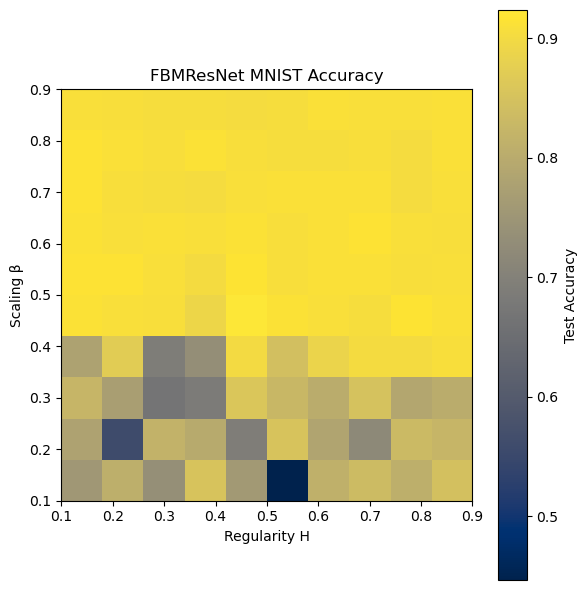

In [11]:
plt.figure(figsize=(6, 6))
plt.imshow(accuracy_matrix, origin='lower', cmap='cividis',
           extent=[H_vals[0], H_vals[-1], beta_vals[0], beta_vals[-1]])
plt.colorbar(label='Test Accuracy')
plt.xlabel('Regularity H')
plt.ylabel('Scaling β')
plt.title('FBMResNet MNIST Accuracy')
plt.tight_layout()
plt.show()


In [7]:
def run_single_model(W_tensor, beta, H, apply_correction, input_dim=28*28, n=20, L=200):
    model = FBMResNet(
        input_dim=input_dim,
        n=n,
        num_layers=L,
        beta=beta,
        H=H,
        apply_correction=apply_correction
    )

    # Overwrite weights to make sure both variants use same W
    for k in range(L):
        model.blocks[k].W.data.copy_(W_tensor[k])

    acc = train_model(model, train_loader, test_loader, lr=0.01, epochs=2)
    return acc


In [22]:
beta_vals = np.linspace(0.05, 1.0, 10)
H_vals = np.linspace(0.05, 1.0, 10)
L = 1000
n = 1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
acc_no_corr = np.zeros((len(beta_vals), len(H_vals)))
acc_with_corr = np.zeros((len(beta_vals), len(H_vals)))

for i, beta in enumerate(tqdm(beta_vals, desc="β")):
    for j, H in enumerate(H_vals):
        # Fix weights so both models use same W_k
        W_tensor = generate_fbm_weight_tensor(L, n, H)

        acc_no = run_single_model(W_tensor, beta, H, apply_correction=False, n=n, L=L)
        acc_yes = run_single_model(W_tensor, beta, H, apply_correction=True, n=n, L=L)

        acc_no_corr[i, j] = acc_no
        acc_with_corr[i, j] = acc_yes


β:   0%|          | 0/10 [15:16<?, ?it/s]


KeyboardInterrupt: 

In [8]:
from joblib import Parallel, delayed
import numpy as np
from tqdm import tqdm

beta_vals = np.linspace(0.05, 1.0, 10)
H_vals = np.linspace(0.05, 1.0, 10)
L = 5000
n = 1

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Shared shape for accuracy matrices
acc_no_corr = np.zeros((len(beta_vals), len(H_vals)))
acc_with_corr = np.zeros((len(beta_vals), len(H_vals)))

# Function to evaluate one (beta, H) pair
def evaluate_pair(beta_idx, H_idx, beta, H):
    W_tensor = generate_fbm_weight_tensor(L, n, H)
    acc_no = run_single_model(W_tensor.clone(), beta, H, apply_correction=False, n=n, L=L)
    acc_yes = run_single_model(W_tensor.clone(), beta, H, apply_correction=True, n=n, L=L)
    return beta_idx, H_idx, acc_no, acc_yes

# Create a job list
job_list = []
for i, beta in enumerate(beta_vals):
    for j, H in enumerate(H_vals):
        job_list.append((i, j, beta, H))

# Run in parallel (adjust n_jobs based on CPU)
results = Parallel(n_jobs=8, verbose=10)(
    delayed(evaluate_pair)(i, j, beta, H) for (i, j, beta, H) in job_list
)

# Populate the matrices
for i, j, acc_no, acc_yes in results:
    acc_no_corr[i, j] = acc_no
    acc_with_corr[i, j] = acc_yes

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed: 15.1min
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed: 29.7min
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed: 31.1min
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed: 59.6min
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 75.9min
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed: 94.6min
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed: 117.7min
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed: 150.2min
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed: 203.4min
[Parallel(n_jobs=8)]: Done  96 out of 100 | elapsed: 231.5min remaining:  9.6min
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed: 238.3min finished


In [2]:
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from joblib import Parallel, delayed
from tqdm import tqdm

# ========== Config ==========
beta_vals = np.linspace(0.05, 1.0, 10)
H_vals = np.linspace(0.05, 1.0, 10)
L = 6000
n = 1
input_dim = 28 * 28

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.set_num_threads(1)

# Accuracy result storage
acc_no_corr = np.zeros((len(beta_vals), len(H_vals)))
acc_with_corr = np.zeros((len(beta_vals), len(H_vals)))

# ========== Dataset ==========
transform = transforms.ToTensor()
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=256)

# ========== FBM Generation ==========
def generate_fbm_path(H, L):
    t = np.linspace(0, 1, L + 1)
    cov = 0.5 * (np.add.outer(t**(2*H), t**(2*H)) - np.abs(np.subtract.outer(t, t))**(2*H))
    L_chol = np.linalg.cholesky(cov + 1e-10 * np.eye(L + 1))
    Z = np.random.randn(L + 1)
    return L_chol @ Z

def generate_fbm_weight_tensor(L, n, H):
    W = np.zeros((L, n, n))
    for i in range(n):
        for j in range(n):
            fbm_path = generate_fbm_path(H, L)
            increments = np.diff(fbm_path)
            W[:, i, j] = (L**H) * increments
    return torch.tensor(W, dtype=torch.float32)

# Precompute FBM tensors for each H
print("\n⏳ Precomputing FBM tensors...")
fbm_cache = {float(H): generate_fbm_weight_tensor(L, n, H) for H in tqdm(H_vals)}
print("✅ FBM precomputation complete.\n")

# ========== Model ==========
class FBMResidualBlock(nn.Module):
    def __init__(self, W_k, beta, L, apply_correction=True, C_H=0.5):
        super().__init__()
        self.W = nn.Parameter(W_k, requires_grad=False)
        self.beta = beta
        self.L = L
        self.C_H = C_H
        self.apply_correction = apply_correction
        self.scale = 1.0 / (L ** beta)

    def forward(self, x):
        sigma = torch.tanh(x)
        drift = F.linear(sigma, self.W)
        out = self.scale * drift
        if self.apply_correction:
            sigma_prime = 1 - sigma**2
            correction = (self.scale**2) * self.C_H * (sigma * sigma_prime)
            out = out + correction
        return x + out

class FBMResNet(nn.Module):
    def __init__(self, input_dim, n, num_layers, beta, H, apply_correction=True):
        super().__init__()
        self.input_layer = nn.Linear(input_dim, n)
        self.output_layer = nn.Linear(n, 10)
        W_tensor = fbm_cache[float(H)]
        self.blocks = nn.ModuleList([
            FBMResidualBlock(W_tensor[k], beta, num_layers, apply_correction)
            for k in range(num_layers)
        ])

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.input_layer(x)
        for block in self.blocks:
            x = block(x)
        return self.output_layer(x)

# ========== Training and Evaluation ==========
def train_model(model, train_loader, test_loader, lr=0.01, epochs=2):
    model = model.to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    for _ in range(epochs):
        model.train()
        for X, y in train_loader:
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            loss = criterion(model(X), y)
            loss.backward()
            optimizer.step()
    return evaluate_model(model, test_loader)

def evaluate_model(model, test_loader):
    model.eval()
    correct = total = 0
    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            preds = model(X).argmax(dim=1)
            correct += (preds == y).sum().item()
            total += y.size(0)
    return correct / total

def run_single_model(W_tensor, beta, H, apply_correction, input_dim=input_dim, n=n, L=L):
    model = FBMResNet(input_dim, n, L, beta, H, apply_correction)
    for k in range(L):
        model.blocks[k].W.data.copy_(W_tensor[k])
    return train_model(model, train_loader, test_loader, lr=0.01, epochs=2)

# ========== Parallel Evaluation ==========
def evaluate_pair(beta_idx, H_idx, beta, H):
    W_tensor = fbm_cache[float(H)]
    acc_no = run_single_model(W_tensor.clone(), beta, H, apply_correction=False, n=n, L=L)
    acc_yes = run_single_model(W_tensor.clone(), beta, H, apply_correction=True, n=n, L=L)
    return beta_idx, H_idx, acc_no, acc_yes

job_list = [(i, j, beta, H) for i, beta in enumerate(beta_vals) for j, H in enumerate(H_vals)]

results = Parallel(n_jobs=5, verbose=10)(
    delayed(evaluate_pair)(i, j, beta, H) for (i, j, beta, H) in job_list
)

for i, j, acc_no, acc_yes in results:
    acc_no_corr[i, j] = acc_no
    acc_with_corr[i, j] = acc_yes



⏳ Precomputing FBM tensors...


100%|██████████| 10/10 [00:11<00:00,  1.13s/it]

✅ FBM precomputation complete.




[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed: 15.6min
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed: 31.3min
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed: 46.8min
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed: 76.9min
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed: 103.3min
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed: 124.8min
[Parallel(n_jobs=5)]: Done  51 tasks      | elapsed: 163.6min


KeyboardInterrupt: 

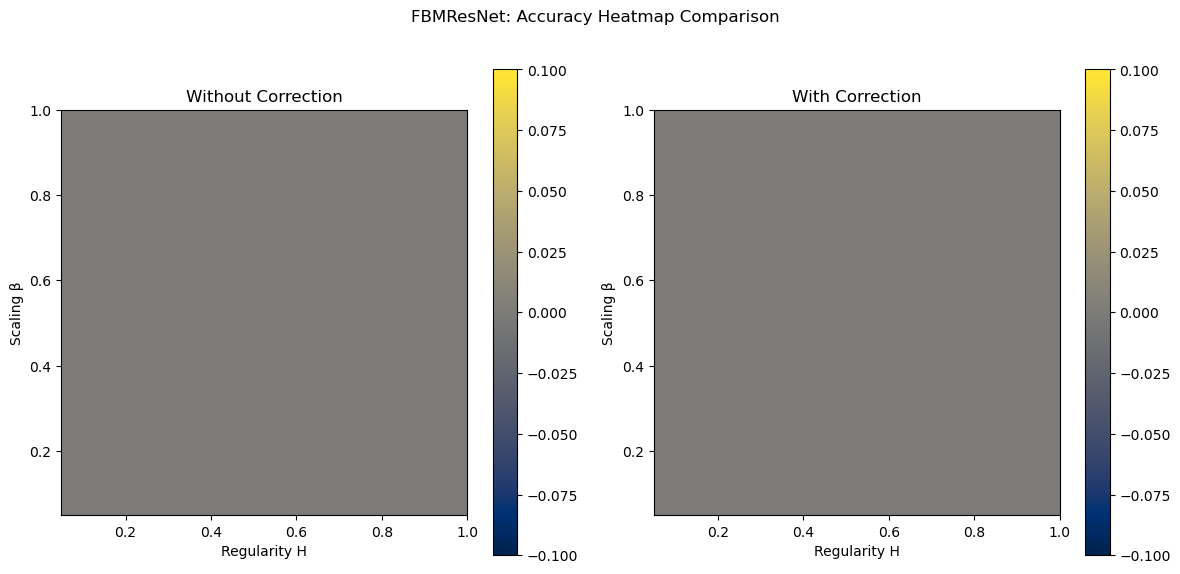

In [3]:
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

im0 = axs[0].imshow(acc_no_corr, origin='lower', cmap='cividis',
                    extent=[H_vals[0], H_vals[-1], beta_vals[0], beta_vals[-1]])
axs[0].set_title("Without Correction")
axs[0].set_xlabel("Regularity H")
axs[0].set_ylabel("Scaling β")
fig.colorbar(im0, ax=axs[0], shrink=0.9)

im1 = axs[1].imshow(acc_with_corr, origin='lower', cmap='cividis',
                    extent=[H_vals[0], H_vals[-1], beta_vals[0], beta_vals[-1]])
axs[1].set_title("With Correction")
axs[1].set_xlabel("Regularity H")
axs[1].set_ylabel("Scaling β")
fig.colorbar(im1, ax=axs[1], shrink=0.9)

plt.suptitle("FBMResNet: Accuracy Heatmap Comparison")
plt.tight_layout()
plt.show()


In [8]:
def train_model_stochastic(model, train_loader, test_loader, lr=0.05, epochs=1, test_interval=100):
    model = model.to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    train_losses = []
    test_losses = []
    iterations = 0

    for epoch in range(epochs):
        model.train()
        for X, y in train_loader:  # Assumes batch size = 1
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            output = model(X)
            loss = criterion(output, y)
            loss.backward()
            optimizer.step()

            train_losses.append(loss.item())
            iterations += 1

            if iterations % test_interval == 0:
                test_loss = compute_test_loss(model, test_loader, criterion)
                test_losses.append((iterations, test_loss))

    return train_losses, test_losses


def compute_test_loss(model, test_loader, criterion):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            outputs = model(X)
            loss = criterion(outputs, y)
            total_loss += loss.item()
    return total_loss / len(test_loader)


In [9]:
def run_single_model_tracking(W_tensor, beta, H, apply_correction, input_dim=28*28, n=20, L=500):
    model = FBMResNet(
        input_dim=input_dim,
        n=n,
        num_layers=L,
        beta=beta,
        H=H,
        apply_correction=apply_correction
    )

    # Overwrite weights to make sure both variants use same W
    for k in range(L):
        model.blocks[k].W.data.copy_(W_tensor[k])

    train_losses, test_losses = train_model_stochastic(
        model, train_loader, test_loader, lr=0.01, epochs=2, test_interval=100
    )
    return train_losses, test_losses


In [10]:
import matplotlib.pyplot as plt
import numpy as np

def plot_loss_curves(train_losses_dict, test_losses_dict, label_prefix):
    plt.figure(figsize=(14, 6))

    # Training Loss
    plt.subplot(1, 2, 1)
    for H, losses in sorted(train_losses_dict.items()):
        smoothed = np.convolve(losses, np.ones(10)/10, mode='valid')  # simple moving average
        log_losses = np.log10(smoothed)
        plt.plot(log_losses, label=f"H={H:.1f}")
    plt.title(f"{label_prefix} | log₁₀ Training Loss vs Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("log₁₀ Lᵏₕ")
    plt.legend()

    # Test Loss
    plt.subplot(1, 2, 2)
    for H, test_data in sorted(test_losses_dict.items()):
        if not test_data:  # skip if empty
            continue
        iterations, test_losses = zip(*test_data)
        log_test_losses = np.log10(test_losses)
        plt.plot(iterations, log_test_losses, label=f"H={H:.1f}")
    plt.title(f"{label_prefix} | log₁₀ Test Loss vs Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("log₁₀ Lᵏₕ")
    plt.legend()

    plt.tight_layout()
    plt.show()


Running experiments by H:   0%|          | 0/9 [00:00<?, ?it/s]

Running experiments by H: 100%|██████████| 9/9 [3:55:42<00:00, 1571.44s/it]  
/var/folders/cx/4rt1cs1j0t9ffbyb2vdx8bv80000gn/T/ipykernel_2541/1166034109.py:11: RuntimeWarning: divide by zero encountered in log10
  log_losses = np.log10(smoothed)


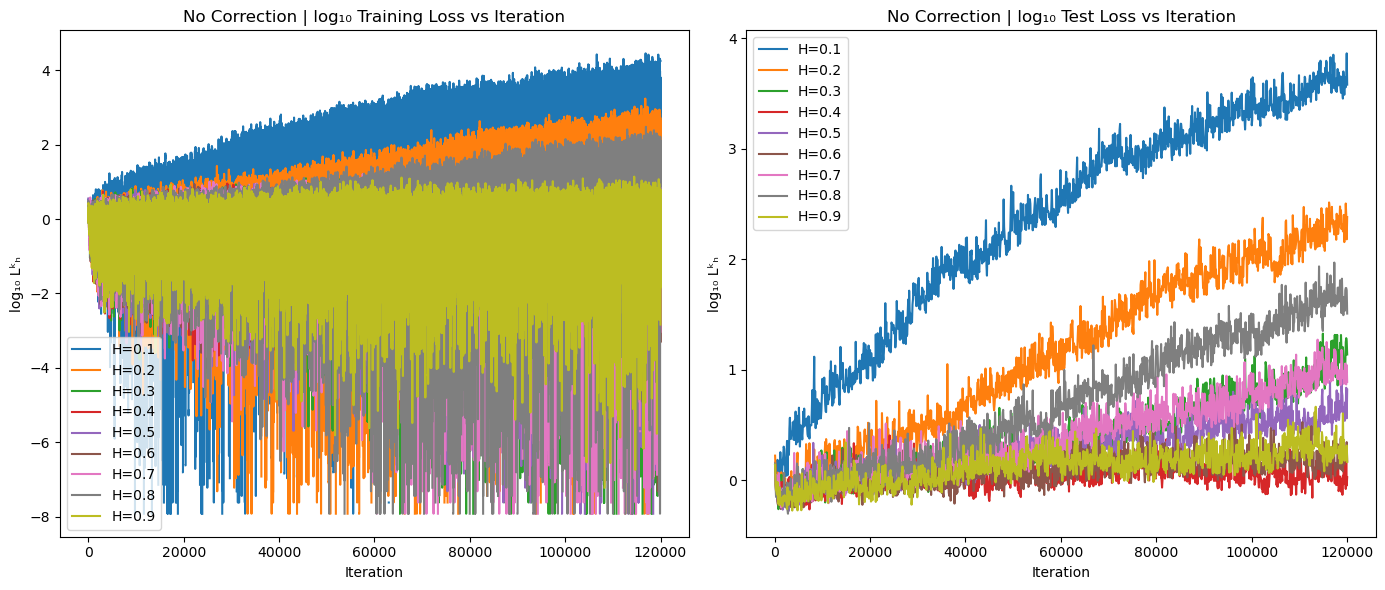

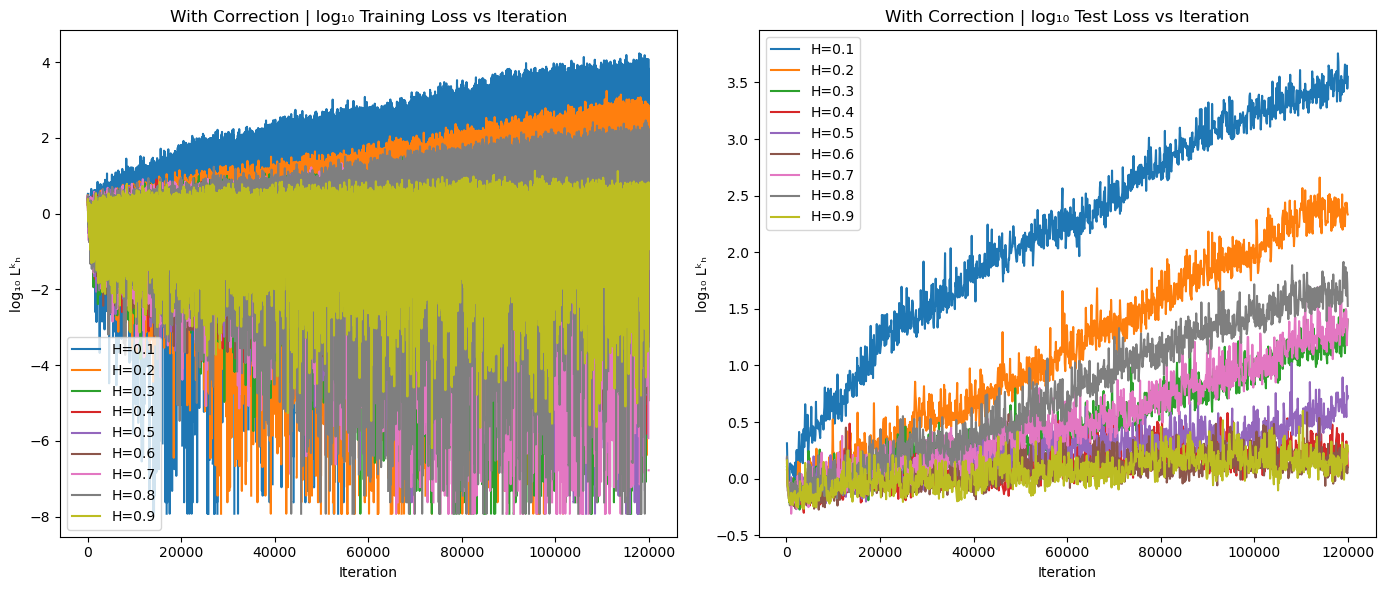

In [11]:
from tqdm import tqdm

selected_H = [0.1,0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_losses_corr = {}
test_losses_corr = {}
train_losses_nocorr = {}
test_losses_nocorr = {}
L=100
n=10
for H in tqdm(selected_H, desc="Running experiments by H"):
    W_tensor = generate_fbm_weight_tensor(L, n, H=H)

    train_no, test_no = run_single_model_tracking(W_tensor, H, H, apply_correction=False, n=n, L=L)
    train_losses_nocorr[H] = train_no
    test_losses_nocorr[H] = test_no

    train_yes, test_yes = run_single_model_tracking(W_tensor, H, H, apply_correction=True, n=n, L=L)
    train_losses_corr[H] = train_yes
    test_losses_corr[H] = test_yes

plot_loss_curves(train_losses_nocorr, test_losses_nocorr, "No Correction")
plot_loss_curves(train_losses_corr, test_losses_corr, "With Correction")

In [11]:
def plot_loss_curves(train_losses_dict, test_losses_dict, label_prefix, exclude_H=None):
    exclude_H = exclude_H or []
    plt.figure(figsize=(14, 6))

    # Training Loss
    plt.subplot(1, 2, 1)
    for H, losses in sorted(train_losses_dict.items()):
        if H in exclude_H:
            continue
        smoothed = np.convolve(losses, np.ones(10)/10, mode='valid')
        log_losses = np.log10(smoothed)
        plt.plot(log_losses, label=f"H={H:.1f}")
    plt.title(f"{label_prefix} | log₁₀ Training Loss vs Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("log₁₀ Lᵏₕ")
    plt.legend()

    # Test Loss
    plt.subplot(1, 2, 2)
    for H, test_data in sorted(test_losses_dict.items()):
        if H in exclude_H or not test_data:
            continue
        iterations, test_losses = zip(*test_data)
        log_test_losses = np.log10(test_losses)
        plt.plot(iterations, log_test_losses, label=f"H={H:.1f}")
    plt.title(f"{label_prefix} | log₁₀ Test Loss vs Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("log₁₀ Lᵏₕ")
    plt.legend()

    plt.tight_layout()
    plt.show()

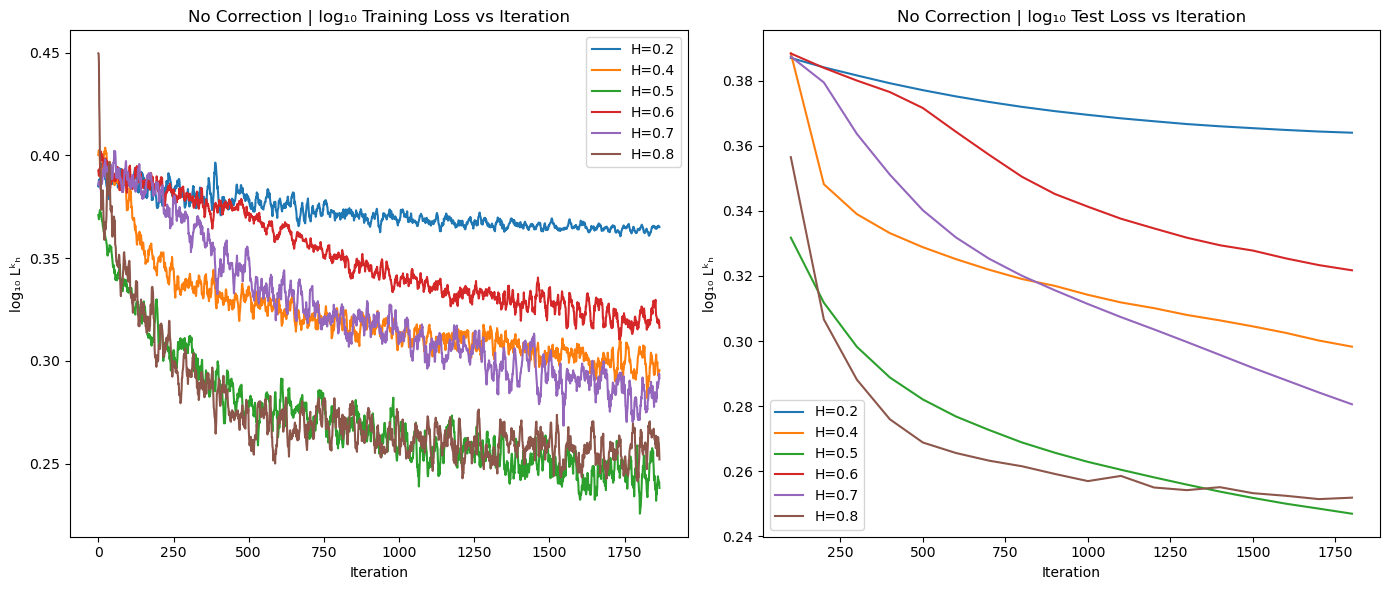

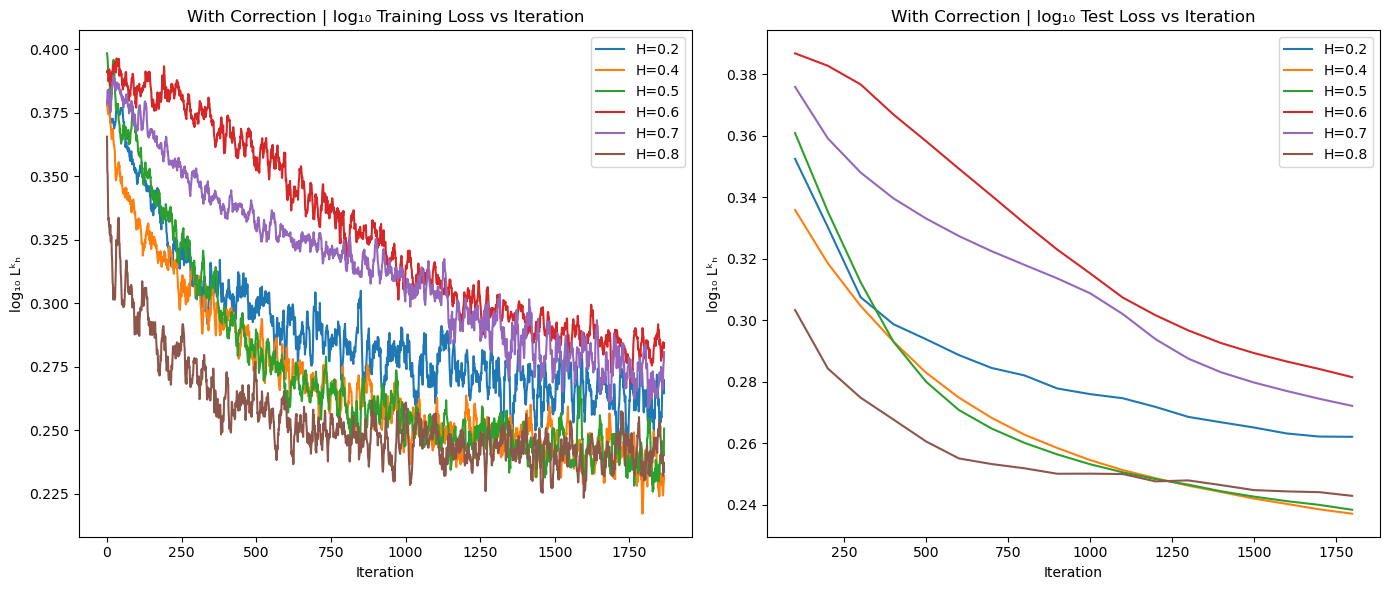

In [12]:
# Define H values to exclude from plots
exclude = [0.1,0.3,0.9]

# Re-plot without rerunning training
plot_loss_curves(train_losses_nocorr, test_losses_nocorr, "No Correction", exclude_H=exclude)
plot_loss_curves(train_losses_corr, test_losses_corr, "With Correction", exclude_H=exclude)

In [13]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transform for CIFAR-10
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                         std=[0.2470, 0.2435, 0.2616])
])

# Load CIFAR-10 dataset
train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=256)


In [14]:
def run_single_model_cifar(W_tensor, beta, H, apply_correction, input_dim=32*32*3, n=20, L=200):
    model = FBMResNet(
        input_dim=input_dim,
        n=n,
        num_layers=L,
        beta=beta,
        H=H,
        apply_correction=apply_correction
    )

    # Overwrite weights to ensure both variants use the same W
    for k in range(L):
        model.blocks[k].W.data.copy_(W_tensor[k])

    acc = train_model(model, train_loader, test_loader, lr=0.01, epochs=3)
    return acc


In [43]:
beta_vals = np.linspace(0.05, 1.0, 10)
H_vals = np.linspace(0.05, 1.0, 10)
L = 10000
n = 2

acc_no_corr = np.zeros((len(beta_vals), len(H_vals)))
acc_with_corr = np.zeros((len(beta_vals), len(H_vals)))

for i, beta in enumerate(tqdm(beta_vals, desc="β")):
    for j, H in enumerate(H_vals):
        input_dim = 32 * 32 * 3
        W_tensor = generate_fbm_weight_tensor(L, n, H)

        acc_no = run_single_model_cifar(W_tensor, beta, H, apply_correction=False, input_dim=input_dim, n=n, L=L)
        acc_yes = run_single_model_cifar(W_tensor, beta, H, apply_correction=True, input_dim=input_dim, n=n, L=L)


        acc_no_corr[i, j] = acc_no
        acc_with_corr[i, j] = acc_yes


β: 100%|██████████| 10/10 [1:45:58<00:00, 635.89s/it]


In [34]:
from joblib import Parallel, delayed
import numpy as np
from tqdm import tqdm

beta_vals = np.linspace(0.05, 1.0, 10)
H_vals = np.linspace(0.05, 1.0, 10)
L = 1000
n = 1
input_dim = 32 * 32 * 3
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Shared shape for accuracy matrices
acc_no_corr = np.zeros((len(beta_vals), len(H_vals)))
acc_with_corr = np.zeros((len(beta_vals), len(H_vals)))

# Function to evaluate one (beta, H) pair
def evaluate_pair(beta_idx, H_idx, beta, H):
    W_tensor = generate_fbm_weight_tensor(L, n, H)
    acc_no = run_single_model_cifar(W_tensor, beta, H, apply_correction=False, input_dim=input_dim, n=n, L=L)
    acc_yes = run_single_model_cifar(W_tensor, beta, H, apply_correction=True, input_dim=input_dim, n=n, L=L)
    return beta_idx, H_idx, acc_no, acc_yes

# Create a job list
job_list = []
for i, beta in enumerate(beta_vals):
    for j, H in enumerate(H_vals):
        job_list.append((i, j, beta, H))

# Run in parallel (adjust n_jobs based on CPU)
results = Parallel(n_jobs=8, verbose=10)(
    delayed(evaluate_pair)(i, j, beta, H) for (i, j, beta, H) in job_list
)

# Populate the matrices
for i, j, acc_no, acc_yes in results:
    acc_no_corr[i, j] = acc_no
    acc_with_corr[i, j] = acc_yes

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:  3.7min
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:  7.1min
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:  7.5min
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed: 14.1min
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed: 18.0min
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed: 21.7min
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed: 26.1min
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed: 32.9min
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed: 40.1min
[Parallel(n_jobs=8)]: Done  96 out of 100 | elapsed: 45.1min remaining:  1.9min
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed: 46.8min finished


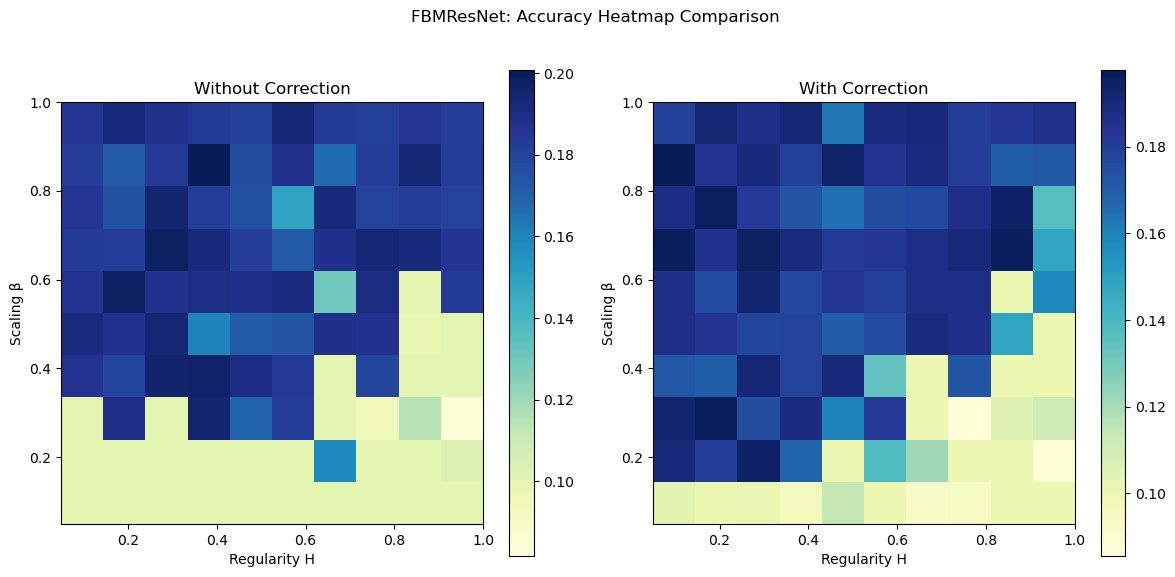

In [35]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Left: Without Correction – using "plasma"
im0 = axs[0].imshow(acc_no_corr, origin='lower', cmap='YlGnBu',
                    extent=[H_vals[0], H_vals[-1], beta_vals[0], beta_vals[-1]])
axs[0].set_title("Without Correction")
axs[0].set_xlabel("Regularity H")
axs[0].set_ylabel("Scaling β")
fig.colorbar(im0, ax=axs[0], shrink=0.9)

# Right: With Correction – using "viridis"
im1 = axs[1].imshow(acc_with_corr, origin='lower', cmap='YlGnBu',
                    extent=[H_vals[0], H_vals[-1], beta_vals[0], beta_vals[-1]])
axs[1].set_title("With Correction")
axs[1].set_xlabel("Regularity H")
axs[1].set_ylabel("Scaling β")
fig.colorbar(im1, ax=axs[1], shrink=0.9)

plt.suptitle("FBMResNet: Accuracy Heatmap Comparison")
plt.tight_layout()
plt.show()


In [15]:
def train_model_with_tracking(model, train_loader, test_loader, lr=0.05, epochs=1, test_interval=100):
    model = model.to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    train_losses = []
    test_losses = []
    iterations = 0

    for epoch in range(epochs):
        model.train()
        for X, y in train_loader:
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            outputs = model(X)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()

            train_losses.append(loss.item())
            iterations += 1

            if iterations % test_interval == 0:
                test_loss = compute_test_loss(model, test_loader, criterion)
                test_losses.append((iterations, test_loss))

    return train_losses, test_losses

def compute_test_loss(model, test_loader, criterion):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            outputs = model(X)
            loss = criterion(outputs, y)
            total_loss += loss.item()
    return total_loss / len(test_loader)


In [16]:
def run_single_model_tracking(W_tensor, beta, H, apply_correction, input_dim=32*32*3, n=20, L=200):
    model = FBMResNet(
        input_dim=input_dim,
        n=n,
        num_layers=L,
        beta=beta,
        H=H,
        apply_correction=apply_correction
    )

    # Overwrite weights with the same FBM tensor
    for k in range(L):
        model.blocks[k].W.data.copy_(W_tensor[k])

    train_losses, test_losses = train_model_with_tracking(
        model,
        train_loader,
        test_loader,
        lr=0.001,
        epochs=5,
        test_interval=100
    )
    return train_losses, test_losses


In [17]:
import matplotlib.pyplot as plt
import numpy as np

def plot_loss_curves(train_losses_dict, test_losses_dict, label_prefix):
    plt.figure(figsize=(14, 6))

    # Training Loss
    plt.subplot(1, 2, 1)
    for H, losses in sorted(train_losses_dict.items()):
        smoothed = np.convolve(losses, np.ones(10)/10, mode='valid')  # simple moving average
        log_losses = np.log10(smoothed)
        plt.plot(log_losses, label=f"H={H:.1f}")
    plt.title(f"{label_prefix} | log₁₀ Training Loss vs Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("log₁₀ Lᵏₕ")
    plt.legend()

    # Test Loss
    plt.subplot(1, 2, 2)
    for H, test_data in sorted(test_losses_dict.items()):
        if not test_data:  # skip if empty
            continue
        iterations, test_losses = zip(*test_data)
        log_test_losses = np.log10(test_losses)
        plt.plot(iterations, log_test_losses, label=f"H={H:.1f}")
    plt.title(f"{label_prefix} | log₁₀ Test Loss vs Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("log₁₀ Lᵏₕ")
    plt.legend()

    plt.tight_layout()
    plt.show()


Running experiments by H: 100%|██████████| 8/8 [36:28<00:00, 273.52s/it]


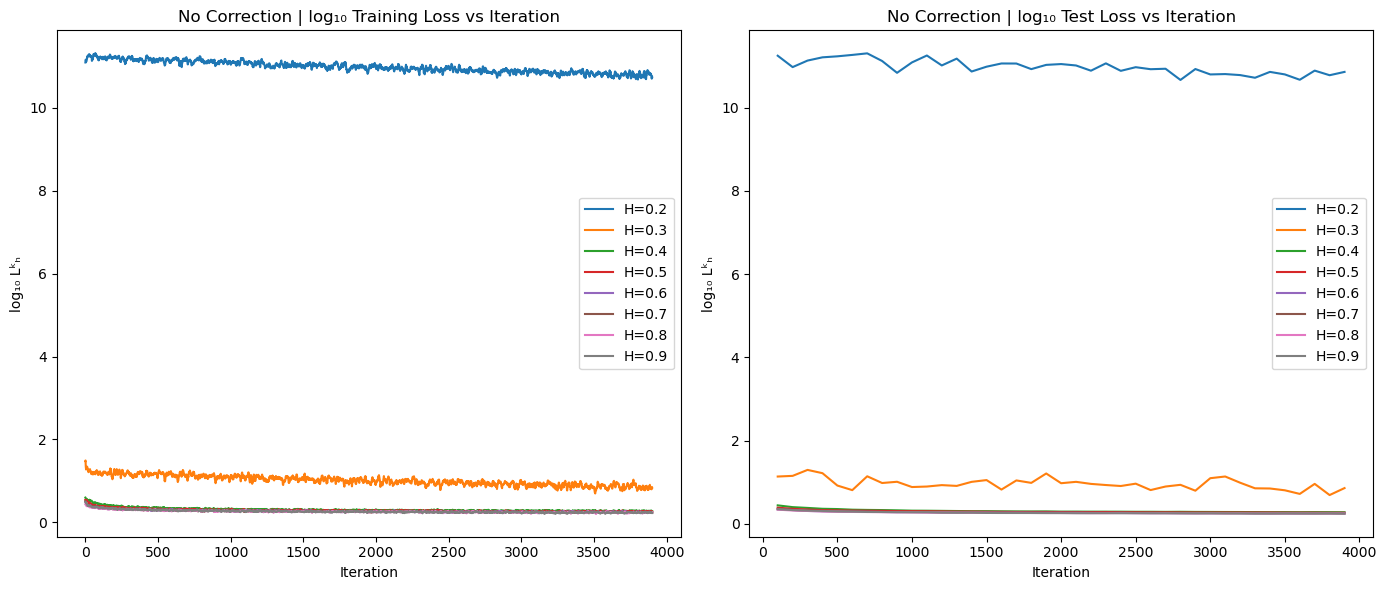

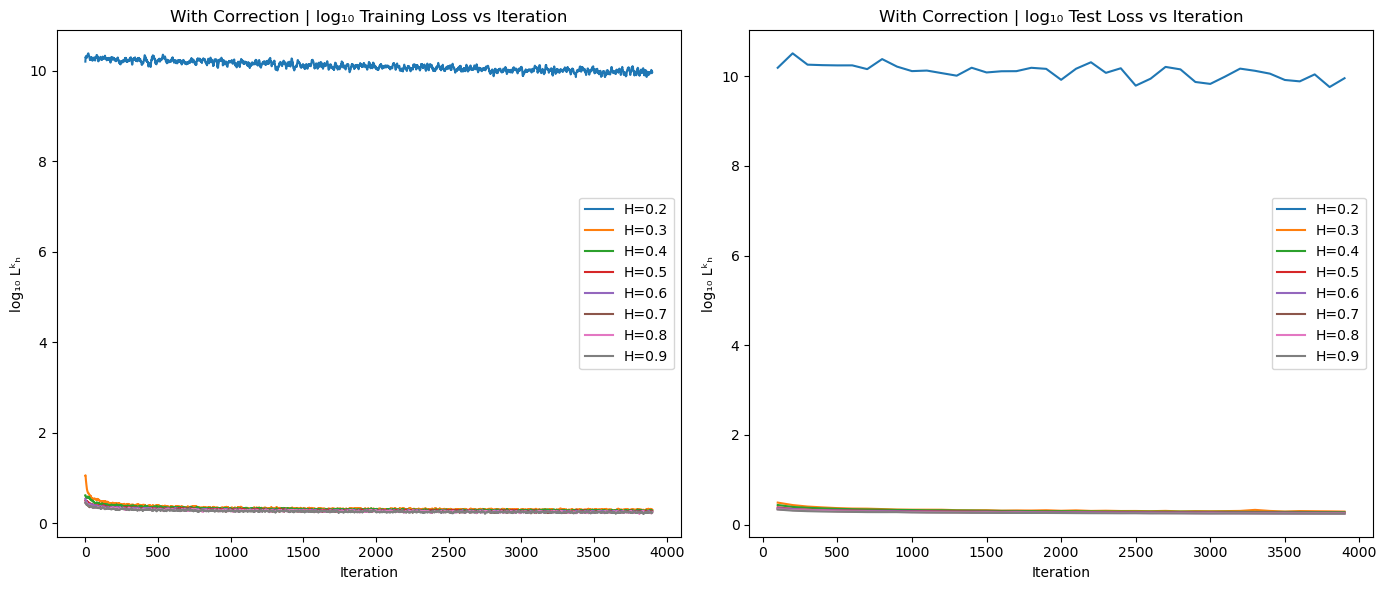

In [18]:
from tqdm import tqdm

selected_H = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_losses_corr = {}
test_losses_corr = {}
train_losses_nocorr = {}
test_losses_nocorr = {}
L=500
n=20
input_dim = 32 * 32 * 3
for H in tqdm(selected_H, desc="Running experiments by H"):
    W_tensor = generate_fbm_weight_tensor(L, n, H=H)

    train_no, test_no = run_single_model_tracking(W_tensor, H, H, apply_correction=False, n=n, L=L)
    train_losses_nocorr[H] = train_no
    test_losses_nocorr[H] = test_no

    train_yes, test_yes = run_single_model_tracking(W_tensor, H, H, apply_correction=True, n=n, L=L)
    train_losses_corr[H] = train_yes
    test_losses_corr[H] = test_yes

plot_loss_curves(train_losses_nocorr, test_losses_nocorr, "No Correction")
plot_loss_curves(train_losses_corr, test_losses_corr, "With Correction")

Running experiments by H: 100%|██████████| 8/8 [46:37<00:00, 349.66s/it]


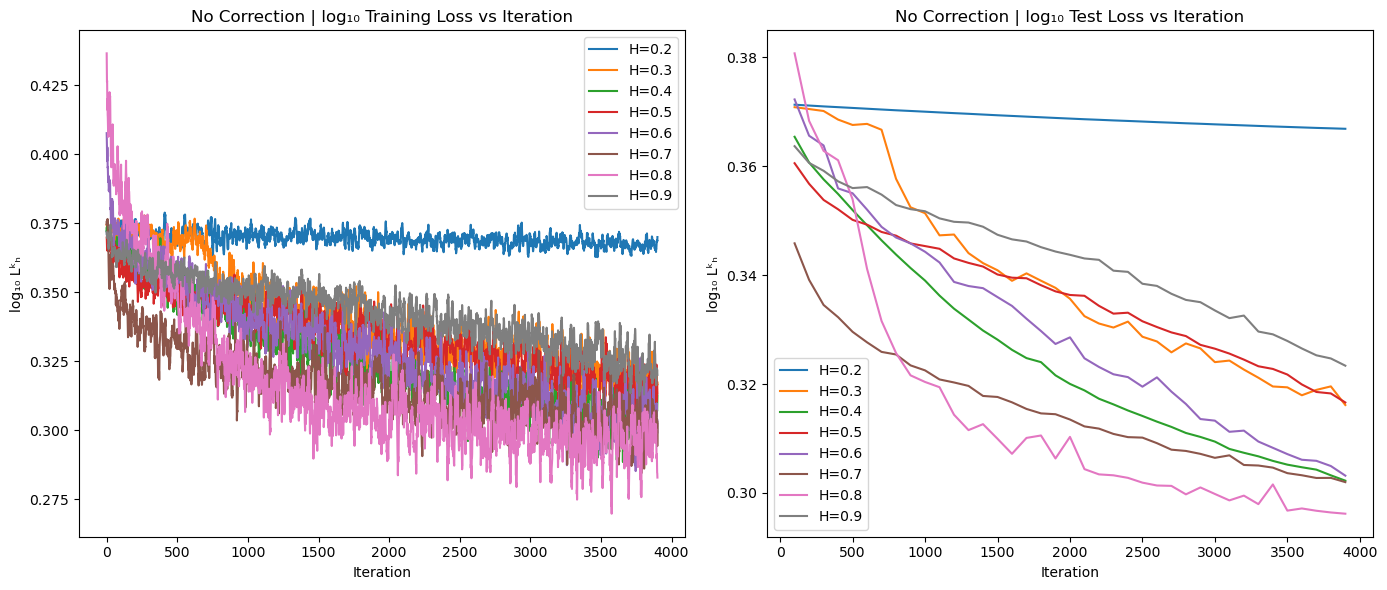

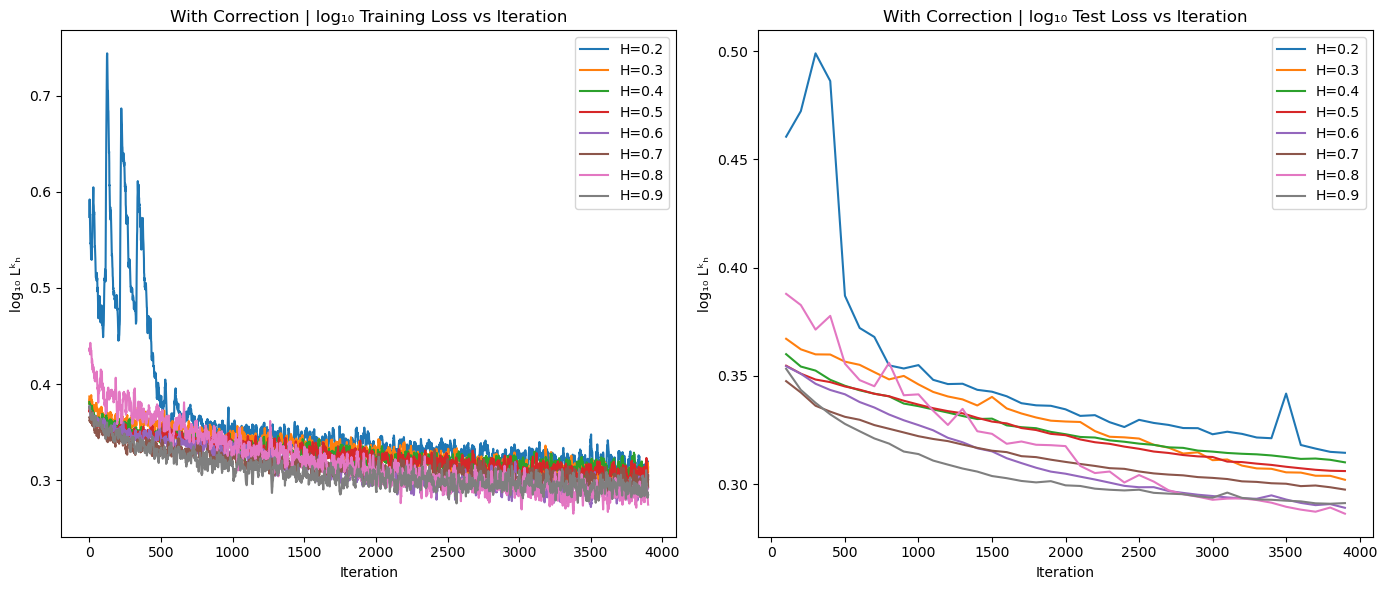

In [20]:
from tqdm import tqdm

selected_H = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_losses_corr = {}
test_losses_corr = {}
train_losses_nocorr = {}
test_losses_nocorr = {}
L=1000
n=3
input_dim = 32 * 32 * 3
for H in tqdm(selected_H, desc="Running experiments by H"):
    W_tensor = generate_fbm_weight_tensor(L, n, H=H)

    train_no, test_no = run_single_model_tracking(W_tensor, H, H, apply_correction=False, n=n, L=L)
    train_losses_nocorr[H] = train_no
    test_losses_nocorr[H] = test_no

    train_yes, test_yes = run_single_model_tracking(W_tensor, H, H, apply_correction=True, n=n, L=L)
    train_losses_corr[H] = train_yes
    test_losses_corr[H] = test_yes

plot_loss_curves(train_losses_nocorr, test_losses_nocorr, "No Correction")
plot_loss_curves(train_losses_corr, test_losses_corr, "With Correction")

Running experiments by H: 100%|██████████| 8/8 [11:52<00:00, 89.08s/it]


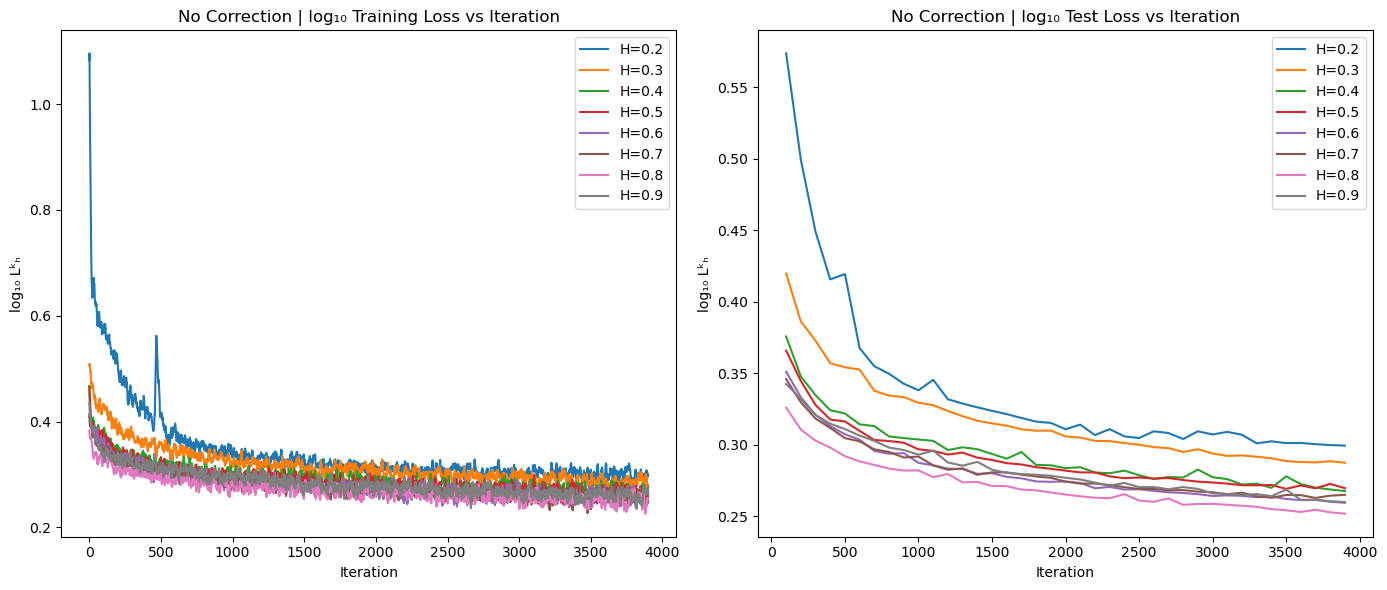

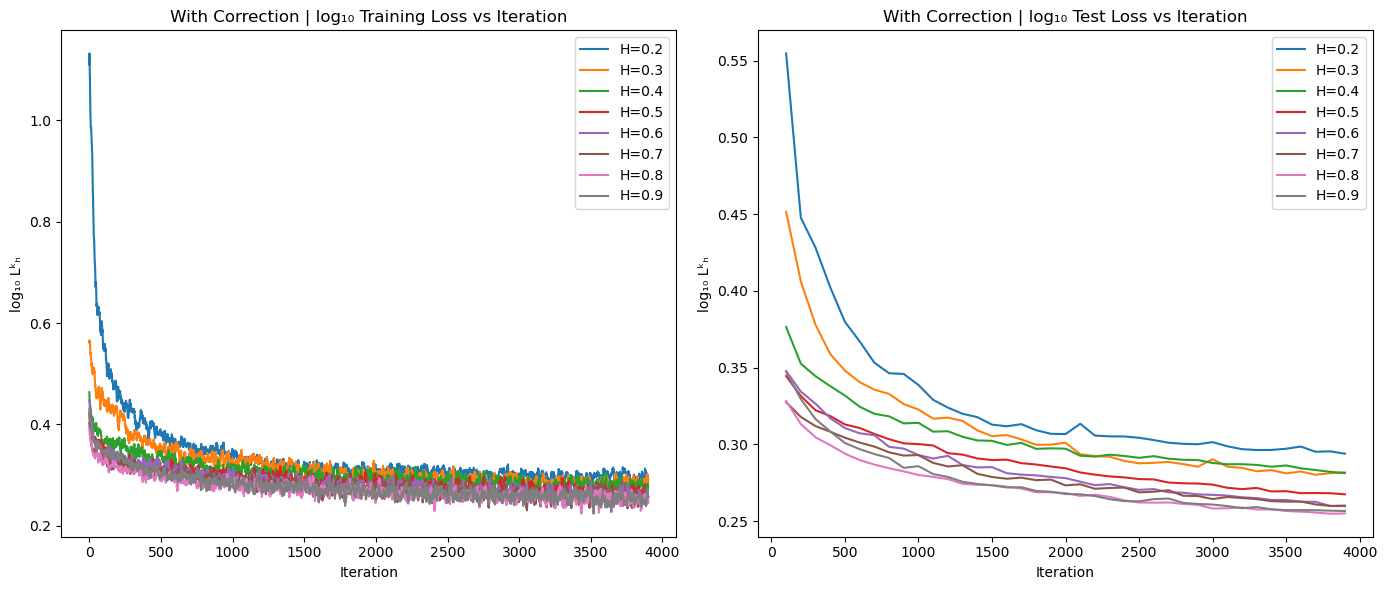

In [21]:
from tqdm import tqdm

selected_H = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_losses_corr = {}
test_losses_corr = {}
train_losses_nocorr = {}
test_losses_nocorr = {}
L=100
n=10
input_dim = 32 * 32 * 3
for H in tqdm(selected_H, desc="Running experiments by H"):
    W_tensor = generate_fbm_weight_tensor(L, n, H=H)

    train_no, test_no = run_single_model_tracking(W_tensor, H, H, apply_correction=False, n=n, L=L)
    train_losses_nocorr[H] = train_no
    test_losses_nocorr[H] = test_no

    train_yes, test_yes = run_single_model_tracking(W_tensor, H, H, apply_correction=True, n=n, L=L)
    train_losses_corr[H] = train_yes
    test_losses_corr[H] = test_yes

plot_loss_curves(train_losses_nocorr, test_losses_nocorr, "No Correction")
plot_loss_curves(train_losses_corr, test_losses_corr, "With Correction")

In [19]:
def plot_loss_curves(train_losses_dict, test_losses_dict, label_prefix, exclude_H=None):
    exclude_H = exclude_H or []
    plt.figure(figsize=(14, 6))

    # Training Loss
    plt.subplot(1, 2, 1)
    for H, losses in sorted(train_losses_dict.items()):
        if H in exclude_H:
            continue
        smoothed = np.convolve(losses, np.ones(10)/10, mode='valid')
        log_losses = np.log10(smoothed)
        plt.plot(log_losses, label=f"H={H:.1f}")
    plt.title(f"{label_prefix} | log₁₀ Training Loss vs Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("log₁₀ Lᵏₕ")
    plt.legend()

    # Test Loss
    plt.subplot(1, 2, 2)
    for H, test_data in sorted(test_losses_dict.items()):
        if H in exclude_H or not test_data:
            continue
        iterations, test_losses = zip(*test_data)
        log_test_losses = np.log10(test_losses)
        plt.plot(iterations, log_test_losses, label=f"H={H:.1f}")
    plt.title(f"{label_prefix} | log₁₀ Test Loss vs Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("log₁₀ Lᵏₕ")
    plt.legend()

    plt.tight_layout()
    plt.show()

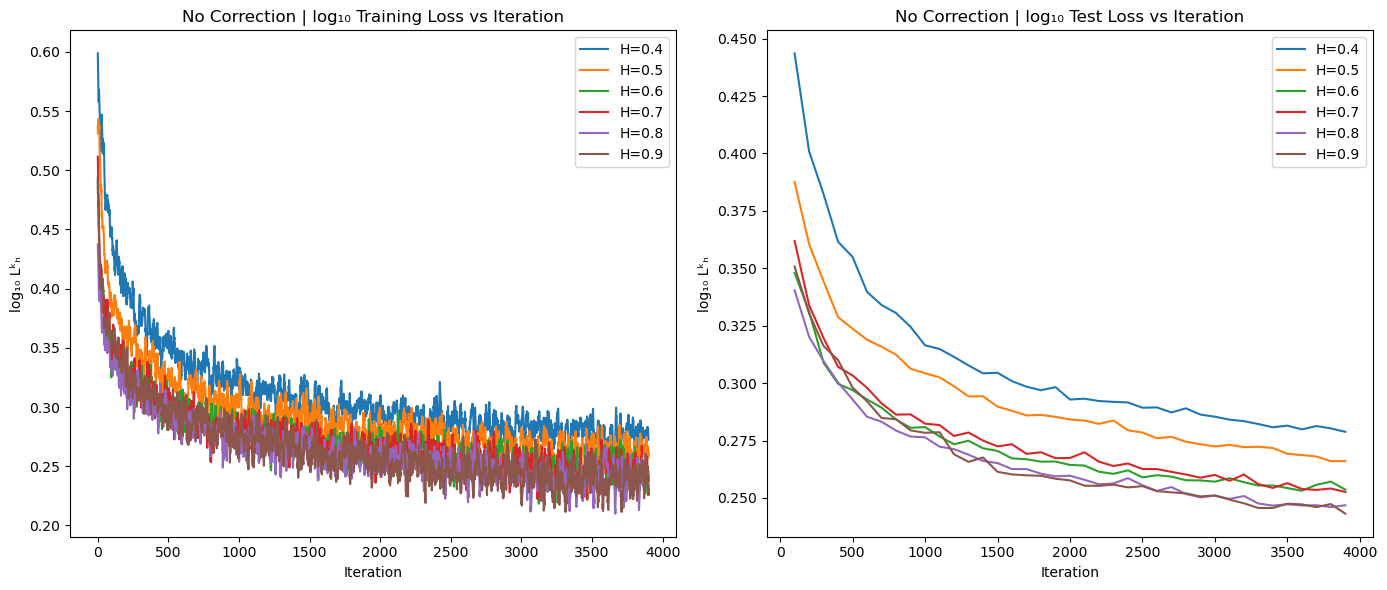

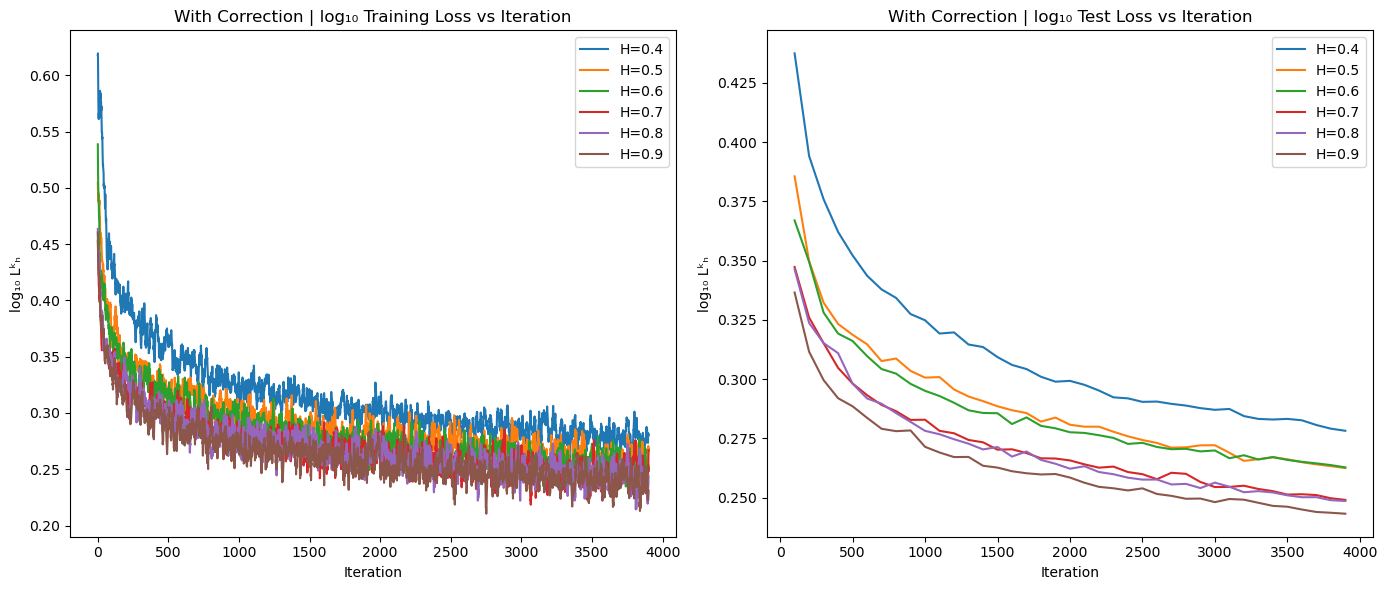

In [20]:
# Define H values to exclude from plots
exclude = [0.2,0.3]

# Re-plot without rerunning training
plot_loss_curves(train_losses_nocorr, test_losses_nocorr, "No Correction", exclude_H=exclude)
plot_loss_curves(train_losses_corr, test_losses_corr, "With Correction", exclude_H=exclude)